# Water Quality and Potability Analysis

## Problem Statement
The main objective of this project is to assess and predict water potability based on water quality attributes. It can be used for evaluating the safety and suitability of water sources for human consumption, making informed decisions about water treatment, and ensuring compliance with water quality standards.

## Data Definition
Each row in the dataset represents a water sample with specific attributes.

**pH**: The pH level of the water.

**Hardness**: Water hardness, a measure of mineral content.

**Solids**: Total dissolved solids in the water.

**Chloramines**: Chloramines concentration in the water.

**Sulfate**: Sulfate concentration in the water.

**Conductivity**: Electrical conductivity of the water.

**Organic_carbon**: Organic carbon content in the water.

**Trihalomethanes**: Trihalomethanes concentration in the water.

**Turbidity**: Turbidity level, a measure of water clarity.

**Above all mention variables are in numeric form.**

**Potability**: Target variable; indicates water potability with values 1 (potable) and 0 (not potable).

## Table of Content

1. **Import Libraries**
2. **Set Options**
3. **Read Data**
4. **Data Analysis and Preparation**
    - 4.1 - **Understand the Dataset**
        - 4.1.1 - **Shape Of Data**
        - 4.1.2 - **Data Type**
        - 4.1.3 - **Summary Statistics**
        - 4.1.4 - **Distribution of Variables**
        - 4.1.5 - **Correlation**
        - 4.1.6 - **Working on Outliers**
        - 4.1.7 - **Missing Values**      
    - 4.2 - **Prepare the Data**
    - 4.3 - **Predefining functions**
5. **Building Classification Models**
    - 5.1 - **Logistic Regression**
        - 5.1.1 - **Logistic Regression (using MLE)**
        - 5.1.2 - **Logistic Regression (using SGD)**
    - 5.2 - **Decision Tree**
        - 5.2.1 - **Prune A Decision Tree**
        - 5.2.2 - **Decision Tree (using GridSearchCV)**
    - 5.3 - **Random Forest**
        - 5.3.1 - **Random Forest Classifier (using GridSearchCV)**
6. **Conclusion and Interpretation**


# 1. Import Libraries

In [1]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns


# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

import statsmodels
import statsmodels.api as sm

# import functions to plot the decision tree
import pydotplus
from IPython.display import Image  
import graphviz
from sklearn.tree import export_graphviz

# 2. Set Options
Now we make necessary changes to :
1. Display complete data frames
2. To avoid the exponential number
3. To Plot all graphs with same size

In [2]:
# display all rows of the dataframe
pd.options.display.max_rows=None

# display all columns of the dataframe
pd.options.display.max_columns=None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

#To fix a particular size for all plots
plt.rcParams['figure.figsize']=(15,8)

# 3. Read Data

In [3]:
data=pd.read_csv(r'D:\Data Science\Capstone Project\water_potability.csv')
# we sample function to randomly view the observations from ou dataset
data.sample(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1326,7.814250,203.383463,24470.20426,7.631407,321.974570,516.646817,17.242909,80.651978,4.104662,0
2900,6.970037,182.888589,32037.60547,7.412765,376.951932,325.792400,14.351241,70.052720,4.275288,0
1282,6.622103,196.891061,16010.52415,7.256071,NaN,264.283933,14.410952,45.448777,5.290921,0
1845,8.176080,201.553701,21856.98863,5.241047,320.260119,464.803330,15.627641,61.654744,4.112322,0
2838,6.761414,216.532498,32156.81944,8.723064,343.601104,526.325214,20.314691,60.521593,4.350207,1
341,NaN,181.210510,30280.78859,10.382547,256.630068,487.997262,11.346302,68.843866,3.779554,1
2296,6.369974,128.616869,13689.59207,9.066830,NaN,319.785076,8.001415,36.007524,3.427066,0
2996,NaN,205.065879,16034.45370,7.136008,397.469678,459.298379,19.637893,70.059835,4.858165,0
1754,5.174346,234.328569,11746.60752,6.961265,314.986801,407.102302,13.771680,36.183536,3.689145,0
475,7.764143,186.132432,25926.07564,8.011207,NaN,399.131718,22.846529,35.243678,4.105178,0


# 4. Data Analysis and Preparation

Data preparation is the process of cleaning and transforming raw data before building predictive models.
Here, we analyze and prepare data to perform classification techniques:
1. Check Shape of data
2. Check data types. Ensure your data types are correct. Refer data definitions to validate 
3. If data types are not as per business definition, change the data types as per requirement 
4. Study summary statistics
5. Distribution of variables
6. Study correlation
7. Detect outliers
8. Check for missing values


## 4.1 Understand the Dataset
### 4.1.1 Shape Of Data

In [4]:
# 'shape' function gives the total number of rows and columns in the data
data.shape

(3276, 10)

### 4.1.2 Data Type

In [5]:
# 'dtypes' gives the data type for each column
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

From above output we can conclude that all data types of variables mention are in numeric form, from data defintion no changes are needed as it is identified correctly.

In [6]:
# splitting features and the target variable
# consider all the columns except 'target' using 'iloc'
df_features = data.iloc[:, data.columns != 'Potability']

# consider the target variable
df_target = data.iloc[:,data.columns == 'Potability']

### 4.1.3 Summary Statistics

In [7]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
df_features.shape

(3276, 9)

In [9]:
df_target.describe()

,Potability
count,3276.000000
mean,0.390110
std,0.487849
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [10]:
df_target.shape

(3276, 1)

### 4.1.4 Distribution of Variables

#### 1. Distribution of  independent variables.

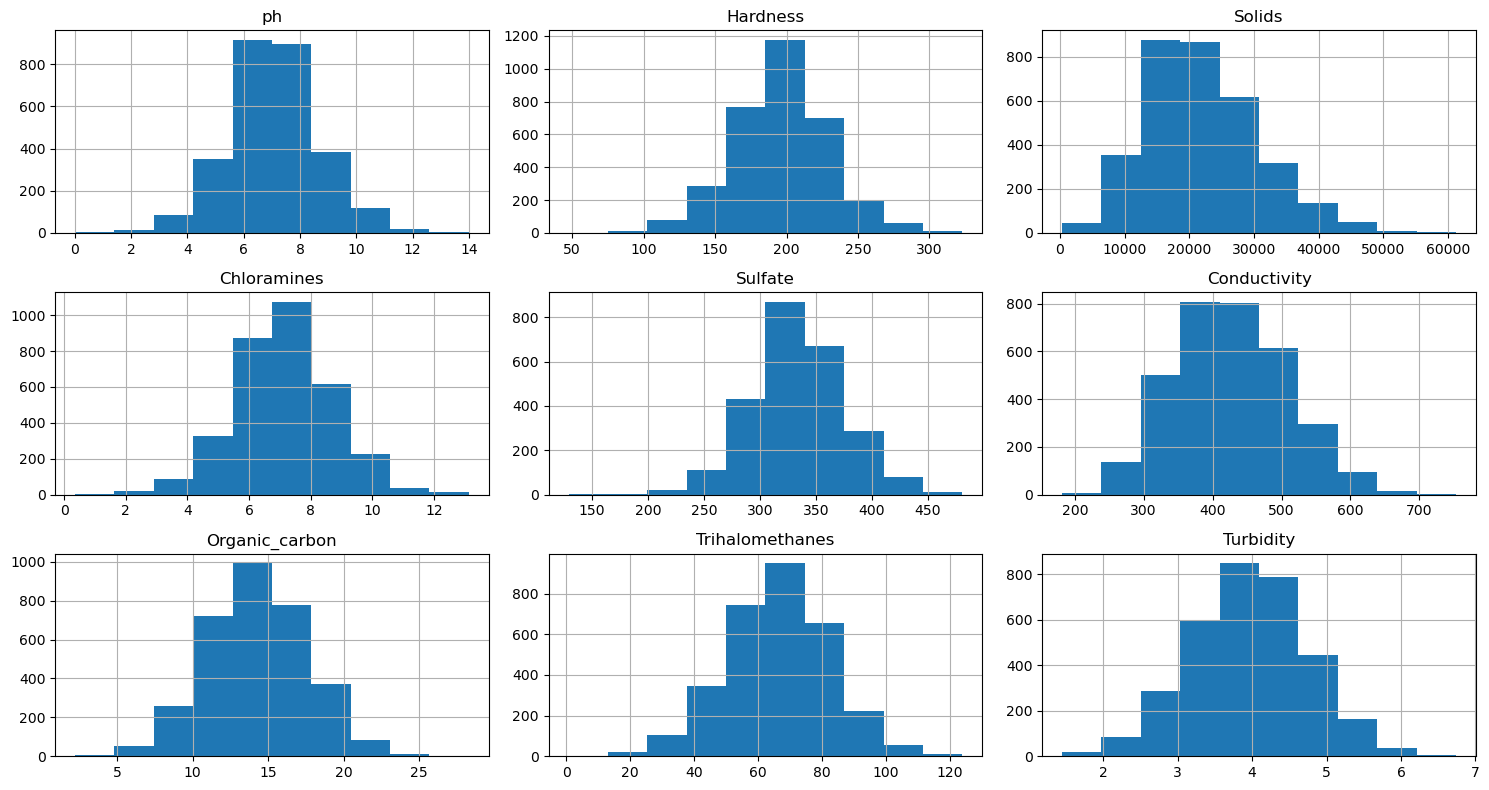

In [11]:
# plot the histogram 
df_features.hist()
plt.tight_layout()
plt.show()

From above plots we can conculde that all independent variables are normally distributed

#### 2. Distribution of dependent variable.

In [12]:
class_frequency = df_target.value_counts()
class_frequency
# to get count of 1 and 0 of target variables

Potability
0             1998
1             1278
Name: count, dtype: int64

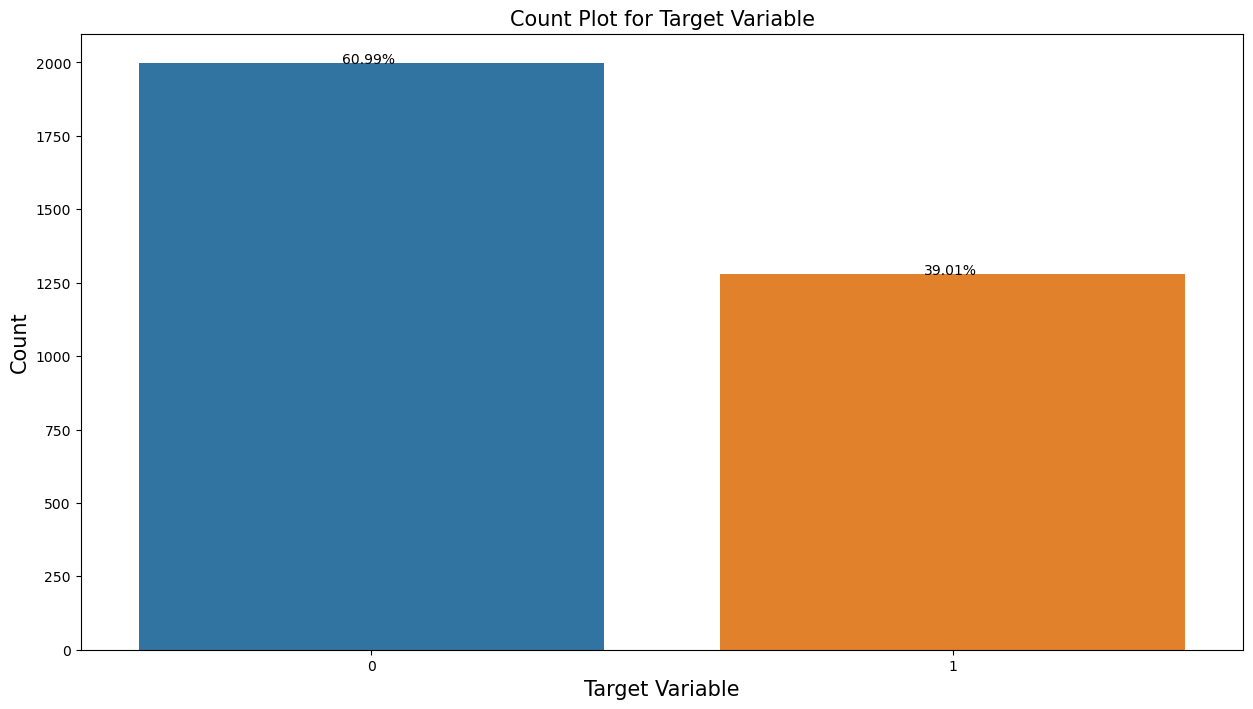

In [13]:
# plot the countplot 
sns.countplot(x = df_target.Potability)
plt.text(x = -0.05, y = df_target.Potability.value_counts()[0],
         s = str(round((class_frequency[0])*100/len(df_target.Potability),2)) + '%')
plt.text(x = 0.95, y = df_target.Potability.value_counts()[1],
         s = str(round((class_frequency[1])*100/len(df_target.Potability),2)) + '%')
plt.title('Count Plot for Target Variable', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

From above diagram we can say 39.01 % says water is potabale for using drinking, cooking, etc purpose and 60.99% says water is not potabale.
There is imbalanced between 1 and 0.

**Note**: If imbalanced is present in dataset we can balance it by SMOTE technique.
SMOTE(Synthetic Minority Over-sampling Technique)

### 4.1.5 Correlation

**1. Compute a correlation matrix**

In [14]:
# corr function is used to calculate the correlation matrix
corr = df_features.corr(numeric_only=True)

**2. Plot the heatmap for the diagonal correlation matrix**

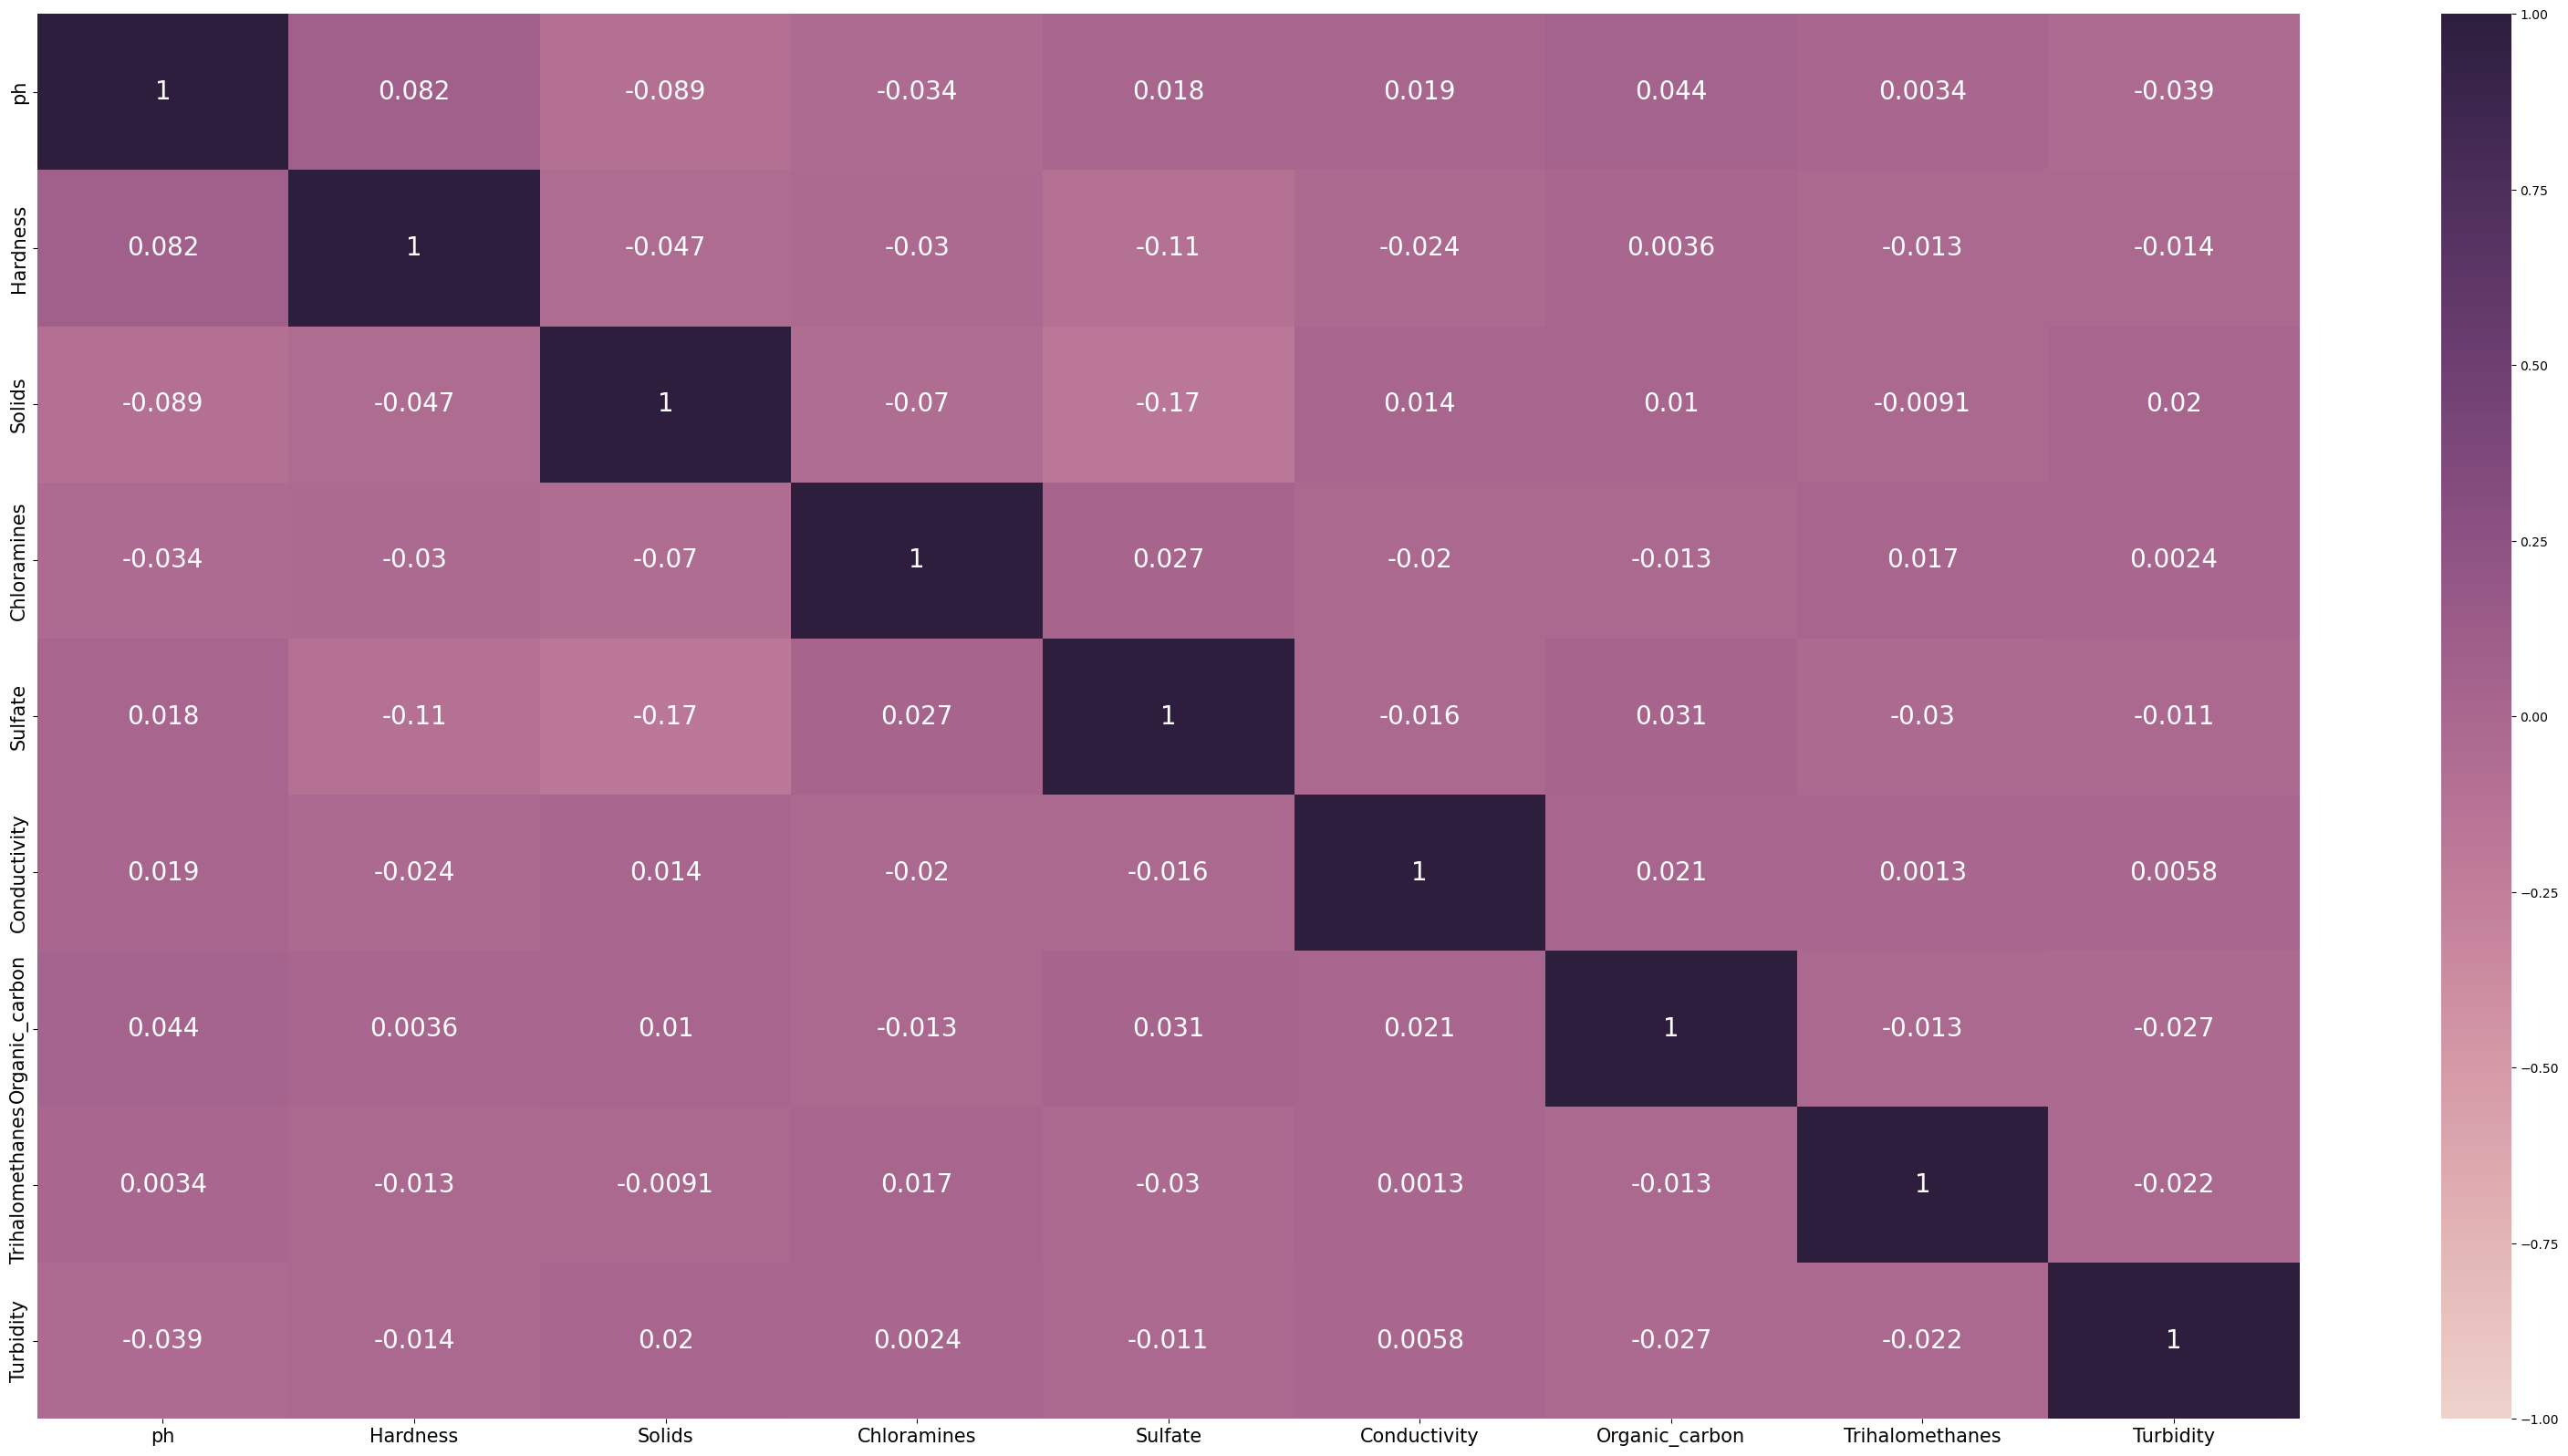

In [15]:
plt.figure(figsize=(40,20))
sns.heatmap(corr,cmap=sns.cubehelix_palette(as_cmap=True),vmax=1.0,vmin=-1.0,
            annot=True,annot_kws={"size":20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

From above heatmap, it can seen that there is not highly correlation within the varaibales with each other.

**Note**: The diagonal values are always 1 because it is the correlation of the variable with itself.

### 4.1.6 Working On Outliers 

**1. Plot the boxplot to visualize outliers**

As, every feature has different range  we can not identify the outliers  clearly. So, we need to visualize every feature separately.

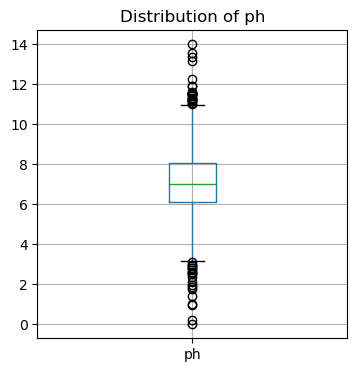

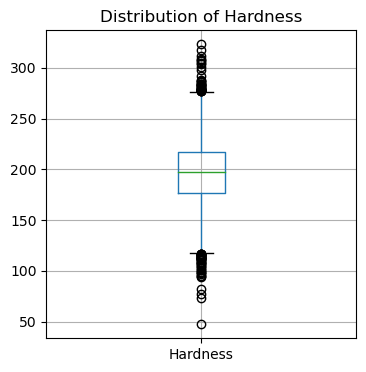

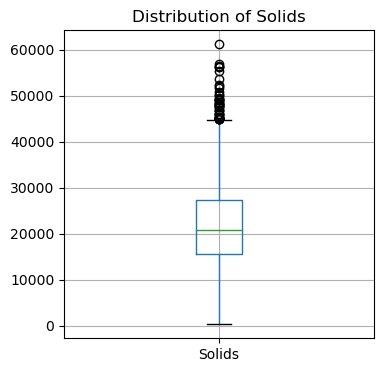

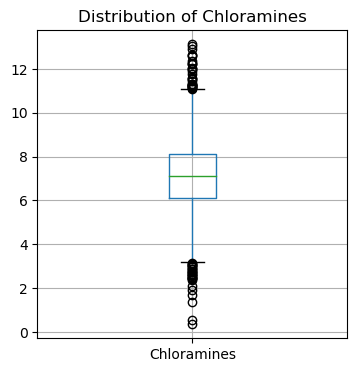

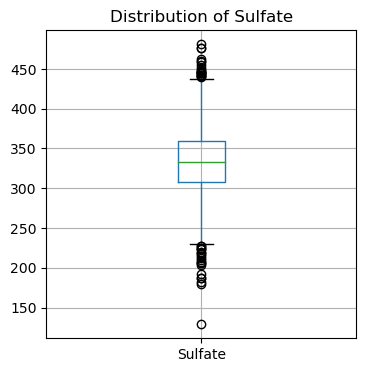

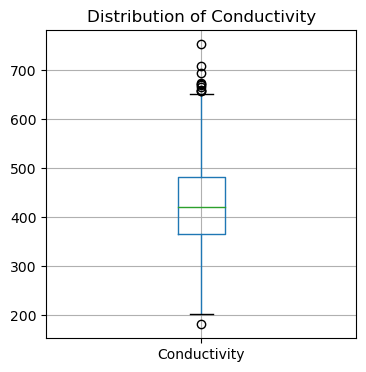

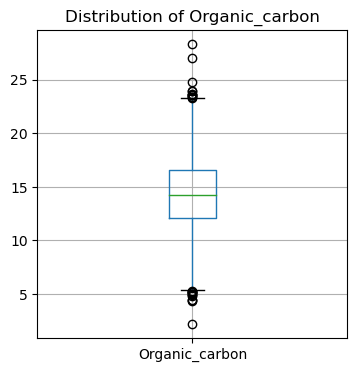

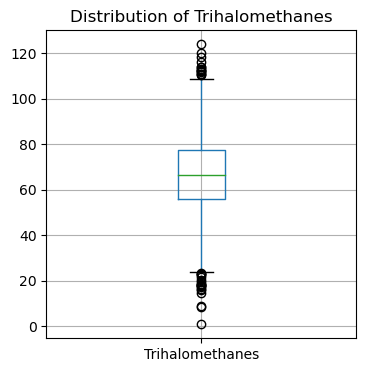

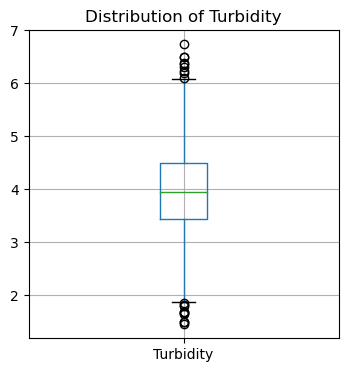

In [16]:
col=['ph']
plt.figure(figsize =(4, 4))
data[col].boxplot()
plt.title("Distribution of ph")
plt.show()

col=['Hardness']
plt.figure(figsize =(4, 4))
data[col].boxplot()
plt.title("Distribution of Hardness")
plt.show()

col=['Solids']
plt.figure(figsize =(4, 4))
data[col].boxplot()
plt.title("Distribution of Solids")
plt.show()

col=['Chloramines']
plt.figure(figsize =(4, 4))
data[col].boxplot()
plt.title("Distribution of Chloramines")
plt.show()

col=['Sulfate']
plt.figure(figsize =(4, 4))
data[col].boxplot()
plt.title("Distribution of Sulfate")
plt.show()

col=['Conductivity']
plt.figure(figsize =(4, 4))
data[col].boxplot()
plt.title("Distribution of Conductivity")
plt.show()

col=['Organic_carbon']
plt.figure(figsize =(4, 4))
data[col].boxplot()
plt.title("Distribution of Organic_carbon")
plt.show()

col=['Trihalomethanes']
plt.figure(figsize =(4, 4))
data[col].boxplot()
plt.title("Distribution of Trihalomethanes")
plt.show()

col=['Turbidity']
plt.figure(figsize =(4, 4))
data[col].boxplot()
plt.title("Distribution of Turbidity")
plt.show()


We have visualize every variable or feature separately because every feature has different range. From looking all plots we can result that, many outliers are persent in every feature. So, we will  remove this outliers  with the help of IQR method. With the help of IQR method we will detect outliers  and remove it from the dataset for better accuracy and performance.

**Note**:IQR-Inter Quartile Range method used to detect outliers.

**2. Remove outliers by IQR method**

In [17]:
# First we will calculate  1st quartile and 3rd quartile.
# Then we will calculate IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ph                     1.968974
Hardness              39.816918
Solids             11666.071825
Chloramines            1.987466
Sulfate               52.250673
Conductivity         116.057890
Organic_carbon         4.491850
Trihalomethanes       21.492937
Turbidity              1.060609
Potability             1.000000
dtype: float64


For every variables we have calculated the IQR and with the help of IQR we will remove outliers.

In [18]:
#Description for the formula
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)

data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

We have reduced or removed the outliers from every feature for confirmation we will visualize boxplot for every feature.

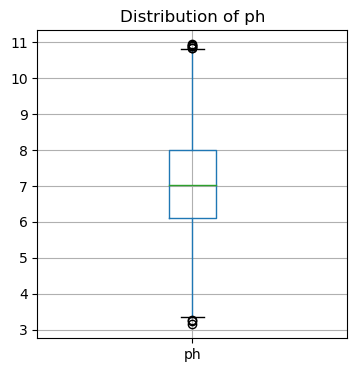

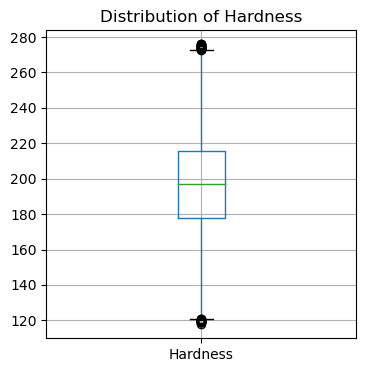

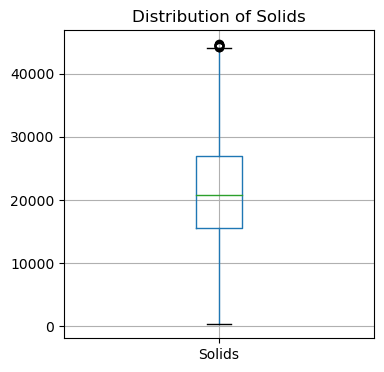

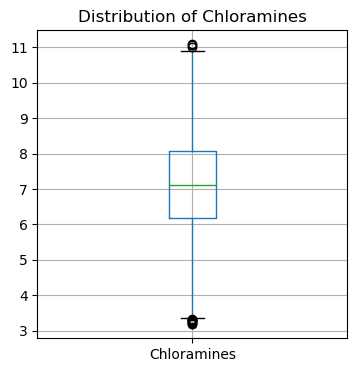

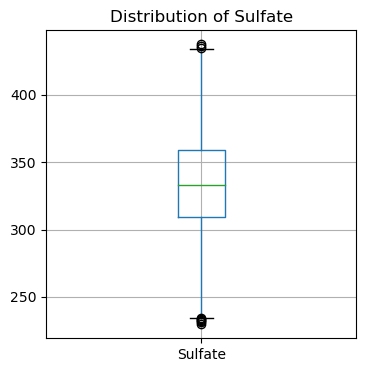

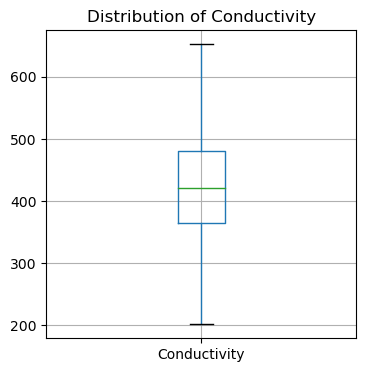

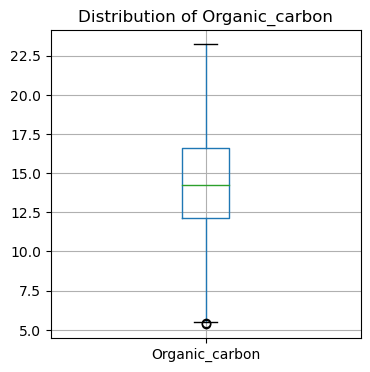

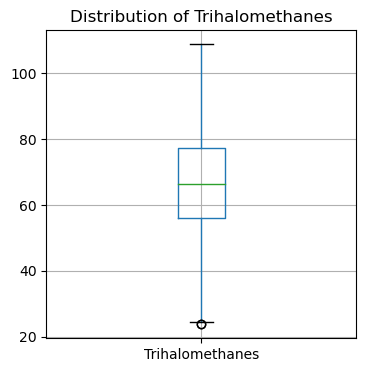

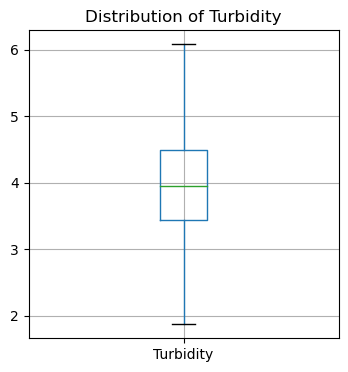

In [19]:
col=['ph']
plt.figure(figsize =(4, 4))
data[col].boxplot()
plt.title("Distribution of ph")
plt.show()

col=['Hardness']
plt.figure(figsize =(4, 4))
data[col].boxplot()
plt.title("Distribution of Hardness")
plt.show()

col=['Solids']
plt.figure(figsize =(4, 4))
data[col].boxplot()
plt.title("Distribution of Solids")
plt.show()

col=['Chloramines']
plt.figure(figsize =(4, 4))
data[col].boxplot()
plt.title("Distribution of Chloramines")
plt.show()

col=['Sulfate']
plt.figure(figsize =(4, 4))
data[col].boxplot()
plt.title("Distribution of Sulfate")
plt.show()

col=['Conductivity']
plt.figure(figsize =(4, 4))
data[col].boxplot()
plt.title("Distribution of Conductivity")
plt.show()

col=['Organic_carbon']
plt.figure(figsize =(4, 4))
data[col].boxplot()
plt.title("Distribution of Organic_carbon")
plt.show()

col=['Trihalomethanes']
plt.figure(figsize =(4, 4))
data[col].boxplot()
plt.title("Distribution of Trihalomethanes")
plt.show()

col=['Turbidity']
plt.figure(figsize =(4, 4))
data[col].boxplot()
plt.title("Distribution of Turbidity")
plt.show()

We can conclude by observing above plots that the outliers are removed or has been reduced.

**Note**:
This is shape before removing outliers
(3276, 10)

In [20]:
# This is shape after removing outliers and lowliers
data.shape

(2951, 10)

### 4.1.7 Checking Missing Values

In [21]:
data.isnull().sum()

ph                 451
Hardness             0
Solids               0
Chloramines          0
Sulfate            704
Conductivity         0
Organic_carbon       0
Trihalomethanes    147
Turbidity            0
Potability           0
dtype: int64

From all vavriables we can observe that Sulfate, ph and Trihalomethanes conatins missing values.
We will deal with missing values by filling average of whole column in those missing values.
We cannot just drop the columns having null values because, every column has its unique contribution for target variable.

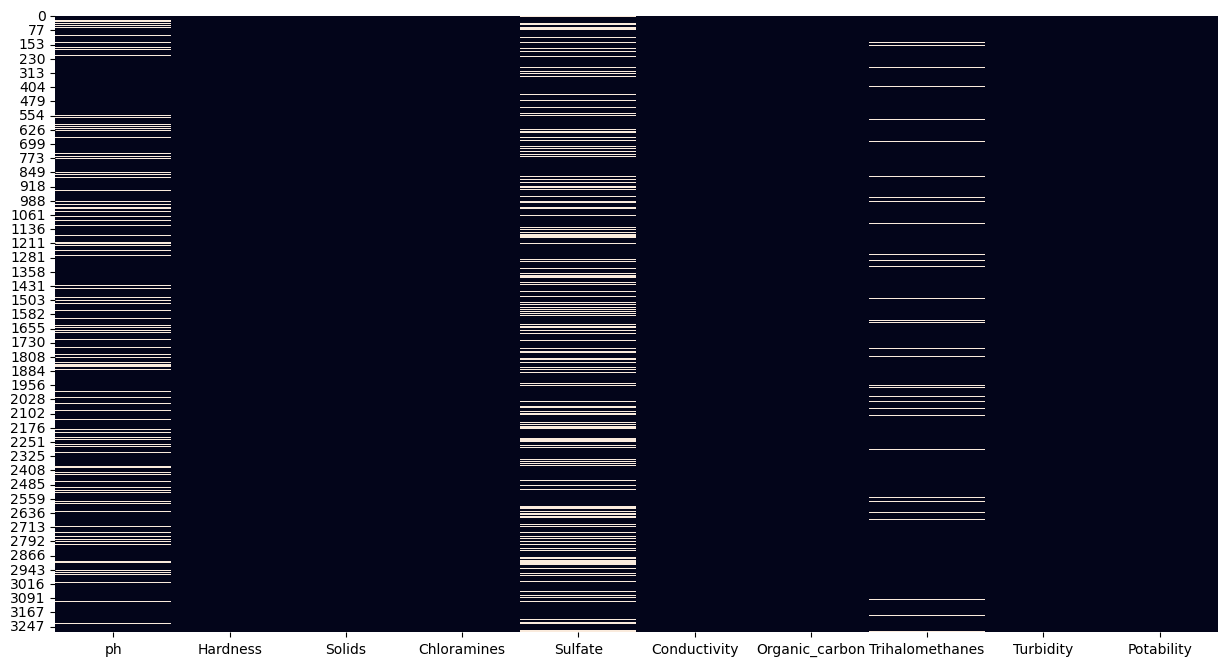

In [22]:
# WE can visualize the null values through heatmap
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [23]:
data['ph'].fillna(data['ph'].mean(),inplace=True)

In [24]:
data['Sulfate'].fillna(data['ph'].mean(),inplace=True)

In [25]:
data['Trihalomethanes'].fillna(data['ph'].mean(),inplace=True)

In [26]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

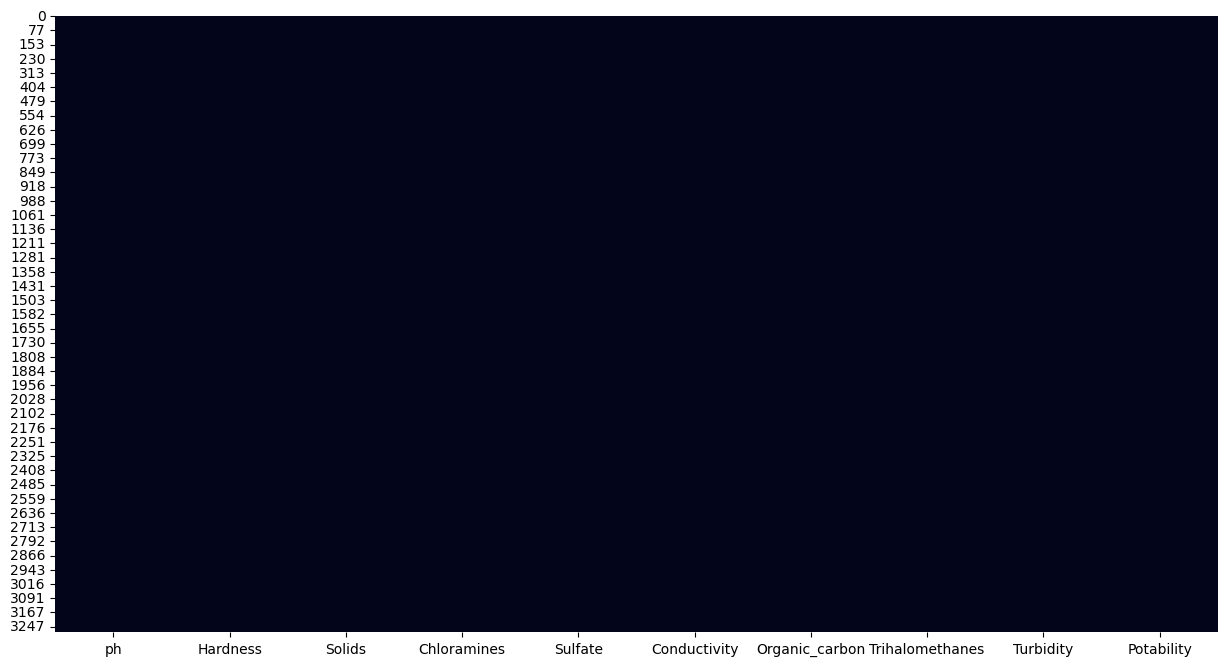

In [27]:
sns.heatmap(data.isnull(), cbar=False)
plt.show()

Above two outputs show that we have deal well with the null values by adding an a average of particular column in it.

In [28]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.073836,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,7.073836,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,7.073836,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## 4.2 Prepare the Data

**1. Features Scaling** 

For better accuracy and performance we need to bring all features at same scale and for that we perfrom features scaling.
Features scaling is technique use to bring all features at same scale.
There are various methods to perform feature scaling we will use Standard Scaler function.

In [29]:
# We make a copy of our dataset to keep main data safe
data_copy=data.copy(deep=True)
# consider all the columns except 'Potability' for featured variables
col=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
features=data_copy[col]
# splitting features and the target variable
# consider the target variable
target=data_copy.drop(col,axis=1)

In [30]:
features_scaled=StandardScaler().fit_transform(features)
features_scaled

array([[-0.        ,  0.28613345, -0.09984326, ..., -1.22828616,
         1.18068498, -1.32276284],
       [-2.52732308, -2.29040411, -0.36734764, ...,  0.26920206,
        -0.35803603,  0.69873171],
       [ 0.77171634,  0.94661866, -0.20898291, ...,  0.79598811,
         0.14836643, -1.20075383],
       ...,
       [ 1.76554752, -0.70831925,  1.43051023, ..., -1.02261395,
         0.32026035, -0.88134001],
       [-1.46552717,  1.16401145, -1.18996205, ..., -0.98209743,
         0.7038034 ,  0.97220787],
       [ 0.60277469, -0.04804407, -0.5190778 , ...,  0.56879594,
         0.76453714, -2.18260793]])

**Lets view our scaled features in proper fromat**

In [31]:
cols=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
features_updated=pd.DataFrame(features_scaled,columns=cols,index=features.index)
features_updated.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-6.685161e-16,0.286133,-0.099843,0.126246,0.784840,1.732275,-1.228286,1.180685,-1.322763
1,-2.527323e+00,-2.290404,-0.367348,-0.336283,-1.738306,2.089019,0.269202,-0.358036,0.698732
2,7.717163e-01,0.946619,-0.208983,1.500457,-1.738306,-0.086634,0.795988,0.148366,-1.200754
3,9.355314e-01,0.609891,0.052038,0.654264,0.703651,-0.777480,1.285109,1.850670,0.867173
4,1.519205e+00,-0.526045,-0.447932,-0.397942,0.377298,-0.338748,-0.860640,-1.579055,0.139189


**2. Assign 'x' and 'y' values**

x-Independent variables

y-Dependent variable

we assign x and y values for model building purpose.

In [32]:
# features_updated contains all updated independent variables
x=pd.DataFrame(features_updated)
x.shape

(2951, 9)

We use this 'X' as a set of predictors to build the classification models.

In [33]:
# Our dependent variable is store in target
y=pd.DataFrame(target)
y.shape

(2951, 1)

We use this 'y' as a target variable to build the classification models.

## 4.3 Predefining Functions

**1. Function helps to calculate the metrics for the test set**

In [34]:
def get_test_report(model):
    return(classification_report(y_test,y_pred))
# returns performance report on test set

**2. Function helps to calculate the kappa score** 

In [35]:
def kappa_score(model):
    return(cohen_kappa_score(y_test,y_pred))
#The kappa statistic is a measure of how closely the instances classified by the machine learning
#classifier matched the data labeled as ground truth, controlling for the accuracy of a random
#classifier as measured by the expected accuracy.
#kappas > 0.75 as excellent, 0.40-0.75 as fair to good, and < 0.40 as poor.

**3. Function helps to plot the confusion matrix**

In [36]:
def plot_confusion_matrix(model):
    cm=confusion_matrix(y_test,y_pred)
    conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],
                            index=['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix,annot=True,fmt='d',cmap=ListedColormap(['lightskyblue']),
               cbar=False,linewidths=0.1,annot_kws={'size':25})
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
# This function helps us to visualize confusion matrix in form of heatmap

**4. Function helps to plot ROC curve with AUC score**

In [37]:
def plot_roc(model):
    fpr,tpr,_=roc_curve(y_test,y_pred_prob)
    plt.plot(fpr,tpr)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.plot([0,1],[0,1],'r--')
    plt.title('ROC curve for Water Potability Classifier', fontsize=15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)
    
# This function  builds a plot that show trade between true positive rate and false positive rate 

**5. Function to create a score card for all classification models**

In [38]:
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score',
                                   'Accuracy Score', 'Kappa Score', 'f1-score'])
def update_score_card(model_name):
    global score_card
    score_card = score_card._append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

# 5. Buliding Classification Models

## 5.1 Logistic Regression 

## 5.1.1 Logistic Regression (using MLE)

**1. Introduce the intercept term**

Statmodels logistic regression function (Logit) does not include the intercept term by default. Thus, we add the intercept column in the dataframe including features.

In [39]:
x=sm.add_constant(x)
x.head()

,const,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,1.0,-6.685161e-16,0.286133,-0.099843,0.126246,0.784840,1.732275,-1.228286,1.180685,-1.322763
1,1.0,-2.527323e+00,-2.290404,-0.367348,-0.336283,-1.738306,2.089019,0.269202,-0.358036,0.698732
2,1.0,7.717163e-01,0.946619,-0.208983,1.500457,-1.738306,-0.086634,0.795988,0.148366,-1.200754
3,1.0,9.355314e-01,0.609891,0.052038,0.654264,0.703651,-0.777480,1.285109,1.850670,0.867173
4,1.0,1.519205e+00,-0.526045,-0.447932,-0.397942,0.377298,-0.338748,-0.860640,-1.579055,0.139189


**2. Split the dataset into train and test sets**

In [40]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 10)

print("X_train",x_train.shape)
print("y_train",y_train.shape)
print("X_test",x_test.shape)
print("y_test",y_test.shape)

X_train (2065, 10)
y_train (2065, 1)
X_test (886, 10)
y_test (886, 1)


**3. Build a logistic regression model using statsmodels `Logit()`**

In [41]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
mle_model=sm.Logit(y_train,x_train).fit()
print(mle_model.summary())

Optimization terminated successfully.
         Current function value: 0.655763
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:             Potability   No. Observations:                 2065
Model:                          Logit   Df Residuals:                     2055
Method:                           MLE   Df Model:                            9
Date:                Wed, 03 Apr 2024   Pseudo R-squ.:                0.003649
Time:                        13:00:14   Log-Likelihood:                -1354.2
converged:                       True   LL-Null:                       -1359.1
Covariance Type:            nonrobust   LLR p-value:                    0.3571
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5414      0.046    -11.816      0.000      -0.631      -0.452
ph            

**4. Do predictions on the test set**

In [42]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = mle_model.predict(x_test)

# print the y_pred_prob
y_pred_prob.head()

1818    0.389346
515     0.352898
2900    0.418272
662     0.375361
986     0.324325
dtype: float64

In [43]:
y_pred_prob.describe()

count    886.000000
mean       0.368458
std        0.032814
min        0.269040
25%        0.346504
50%        0.368911
75%        0.391716
max        0.474811
dtype: float64

Since the target variable can take only two values either 0 or 1. We decide the threshold of 0.35. If `y_pred_prob` is less than 0.35, then consider it to be 0 else consider it to be 1.
0.35 threshold because, we can see the mean value in y_pred_prob is 0.36 and maximum value is 0.47.
So, mean value would be nice value to set as threshold value.

In [44]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = ['0' if x < 0.35 else '1' for x in y_pred_prob]

In [45]:
# convert the predicted values to type 'float32'
y_pred = np.array(y_pred, dtype=np.float32)

# print the first five predictions
y_pred[0:5]

array([1., 1., 1., 1., 0.], dtype=float32)

**5. Calculate the performance measures**

**Confusion matrix**

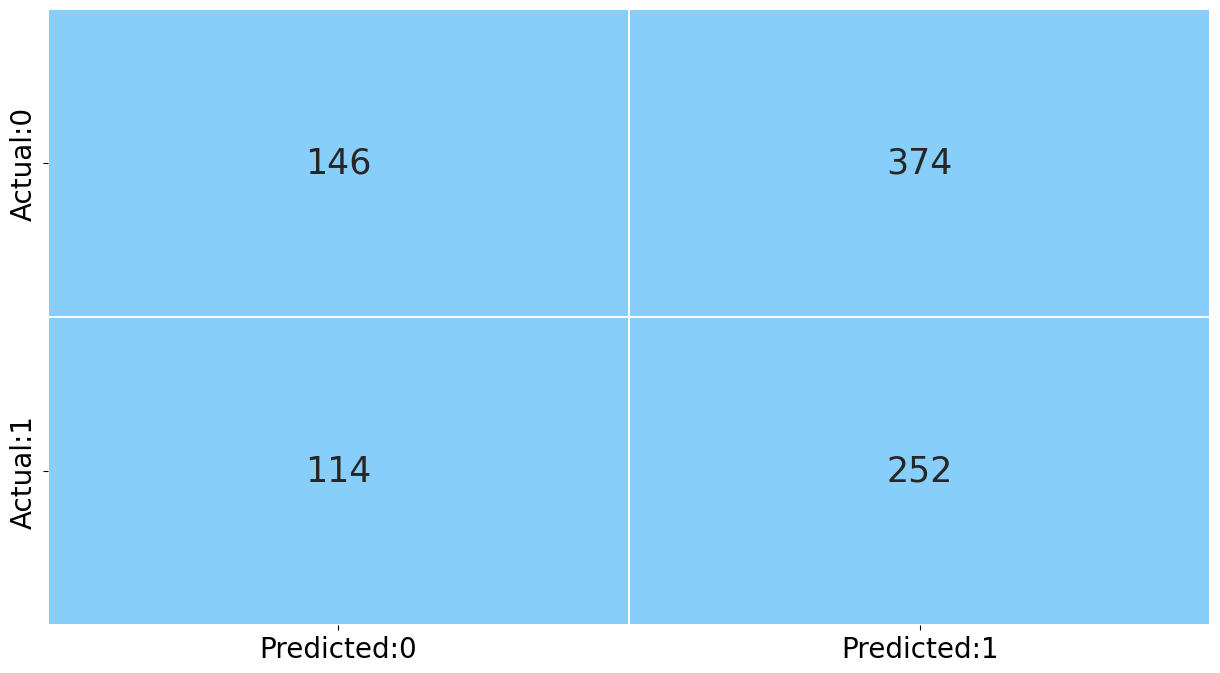

In [46]:
plot_confusion_matrix(mle_model)

**Calculate performance measures on the test set**

In [47]:
test_report = get_test_report(mle_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.56      0.28      0.37       520
           1       0.40      0.69      0.51       366

    accuracy                           0.45       886
   macro avg       0.48      0.48      0.44       886
weighted avg       0.50      0.45      0.43       886



**Interpretation:** The accuracy is 45% for this model.

**Calculate Kappa Score**

In [48]:
kappa_value = kappa_score(mle_model)
print(kappa_value)

-0.02778358847580109


**Plot the ROC curve.**

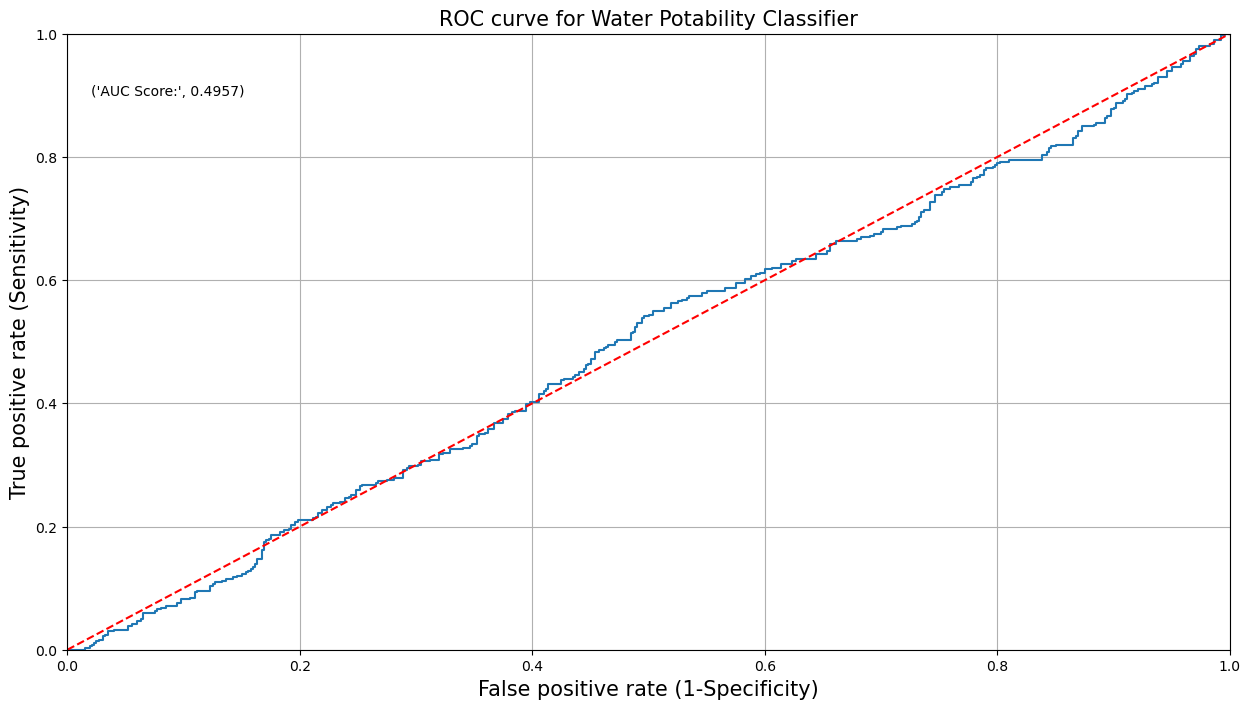

In [49]:
plot_roc(mle_model)

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
We see our classifier (logistic regression) to be almost on same line to the dotted line with the AUC score 0.4957.

**6. Tabulate the results**

In [50]:
update_score_card(model_name = 'Logistic Regression (MLE)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression (MLE),0.495728,0.402556,0.688525,0.44921,-0.027784,0.508065


## 5.1.2 Logistic Regression (using SGD)

**1. Scale the data features**

We do not need to scale the data, as we have already sacled features in the 4.2 Prepare data part.

**2. Split the data into training and test sets**

In [67]:
x=pd.DataFrame(features_updated)
y=pd.DataFrame(target)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 10)

print("X_train",x_train.shape)
print("y_train",y_train.shape)
print("X_test",x_test.shape)
print("y_test",y_test.shape)

Counter({'Potability': 1})
X_train (2553, 9)
y_train (2553, 1)
X_test (1095, 9)
y_test (1095, 1)


**3. Build the model**

The `SGDClassifier()` from sklearn contains an intercept term. Thus, there is no need to add the column of intercept.

In [68]:
SGD=SGDClassifier(loss='log_loss',random_state=10)
sgd_model=SGD.fit(x_train,y_train)

**4. Do predictions on the test set**

In [69]:
y_pred_prob=sgd_model.predict_proba(x_test)[:,1]

In [70]:
y_pred=sgd_model.predict(x_test)

**5. Calculate the performance measures**

**Confusion Matrix**

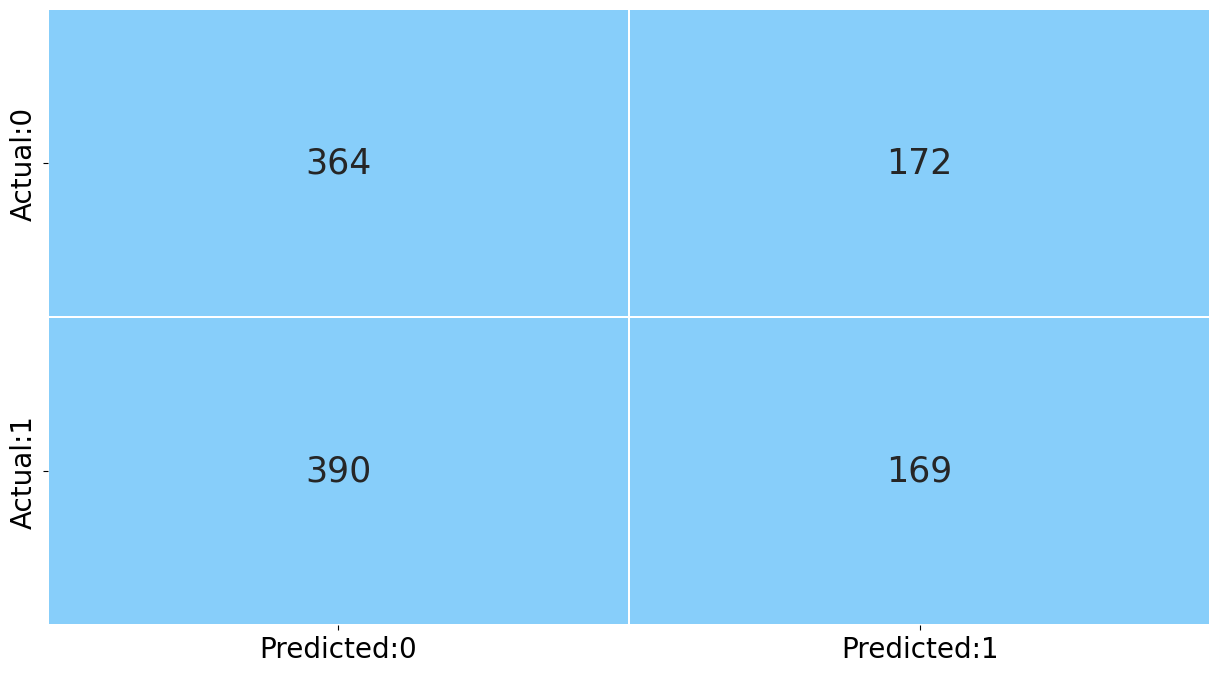

In [71]:
plot_confusion_matrix(sgd_model)

**Calculate performance measures on the test set.**

In [72]:
test_report=get_test_report(sgd_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.48      0.68      0.56       536
           1       0.50      0.30      0.38       559

    accuracy                           0.49      1095
   macro avg       0.49      0.49      0.47      1095
weighted avg       0.49      0.49      0.47      1095



**Interpretation:** The accuracy is 53% for this model.

**Calculate Kappa Score**

In [57]:
kappa_value=kappa_score(sgd_model)
print(kappa_value)

0.004115986099044289


**Plot ROC Curve**

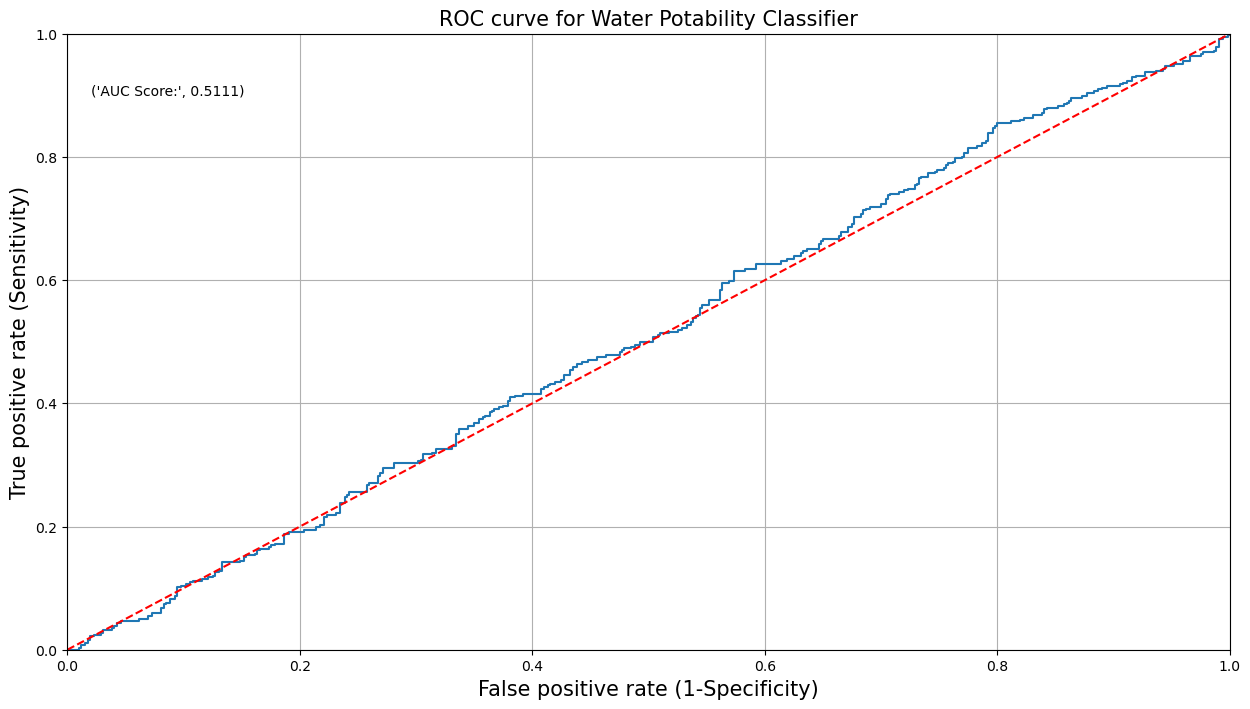

In [58]:
plot_roc(sgd_model)

We see our classifier (logistic regression with SGD) to be almost on same line to the dotted line with the AUC score 0.5111.

**6. Tabulate the results**

In [59]:
update_score_card(model_name = 'Logistic Regression (SGD)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression (MLE),0.495728,0.402556,0.688525,0.449210,-0.027784,0.508065
1,Logistic Regression (SGD),0.511060,0.416084,0.325137,0.532731,0.004116,0.365031


## 5.2 Decision Tree

Decision Tree is a non-parametric supervised learning method. It builds a regression model in the form of a tree structure. It breaks down a data set into smaller and smaller subsets, which is called splitting. The final result is a tree with a decision and leaf nodes. A decision node has two or more branches. The leaf node represents a class or decision. The topmost decision node in a tree that corresponds to the best predictor called 'root node'. The decision tree is built using different criteria like gini index, and entropy.

**1. Split the dataset into train and test sets**

In [60]:
x=pd.DataFrame(features_updated)
y=pd.DataFrame(target)
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 10)

print("X_train",x_train.shape)
print("y_train",y_train.shape)
print("X_test",x_test.shape)
print("y_test",y_test.shape)

X_train (2065, 9)
y_train (2065, 1)
X_test (886, 9)
y_test (886, 1)


**2. Build the model**

To build the decision tree, we used the criterion of 'entropy'. Entropy is one of the criteria used to build the decision tree. It calculates the homogeneity of the sample. The entropy is zero if the sample is completely homogeneous, and it is equal to 1 if the sample is equally divided.

In [61]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree_model = decision_tree.fit(x_train, y_train)

**Plot Desicion Tree**

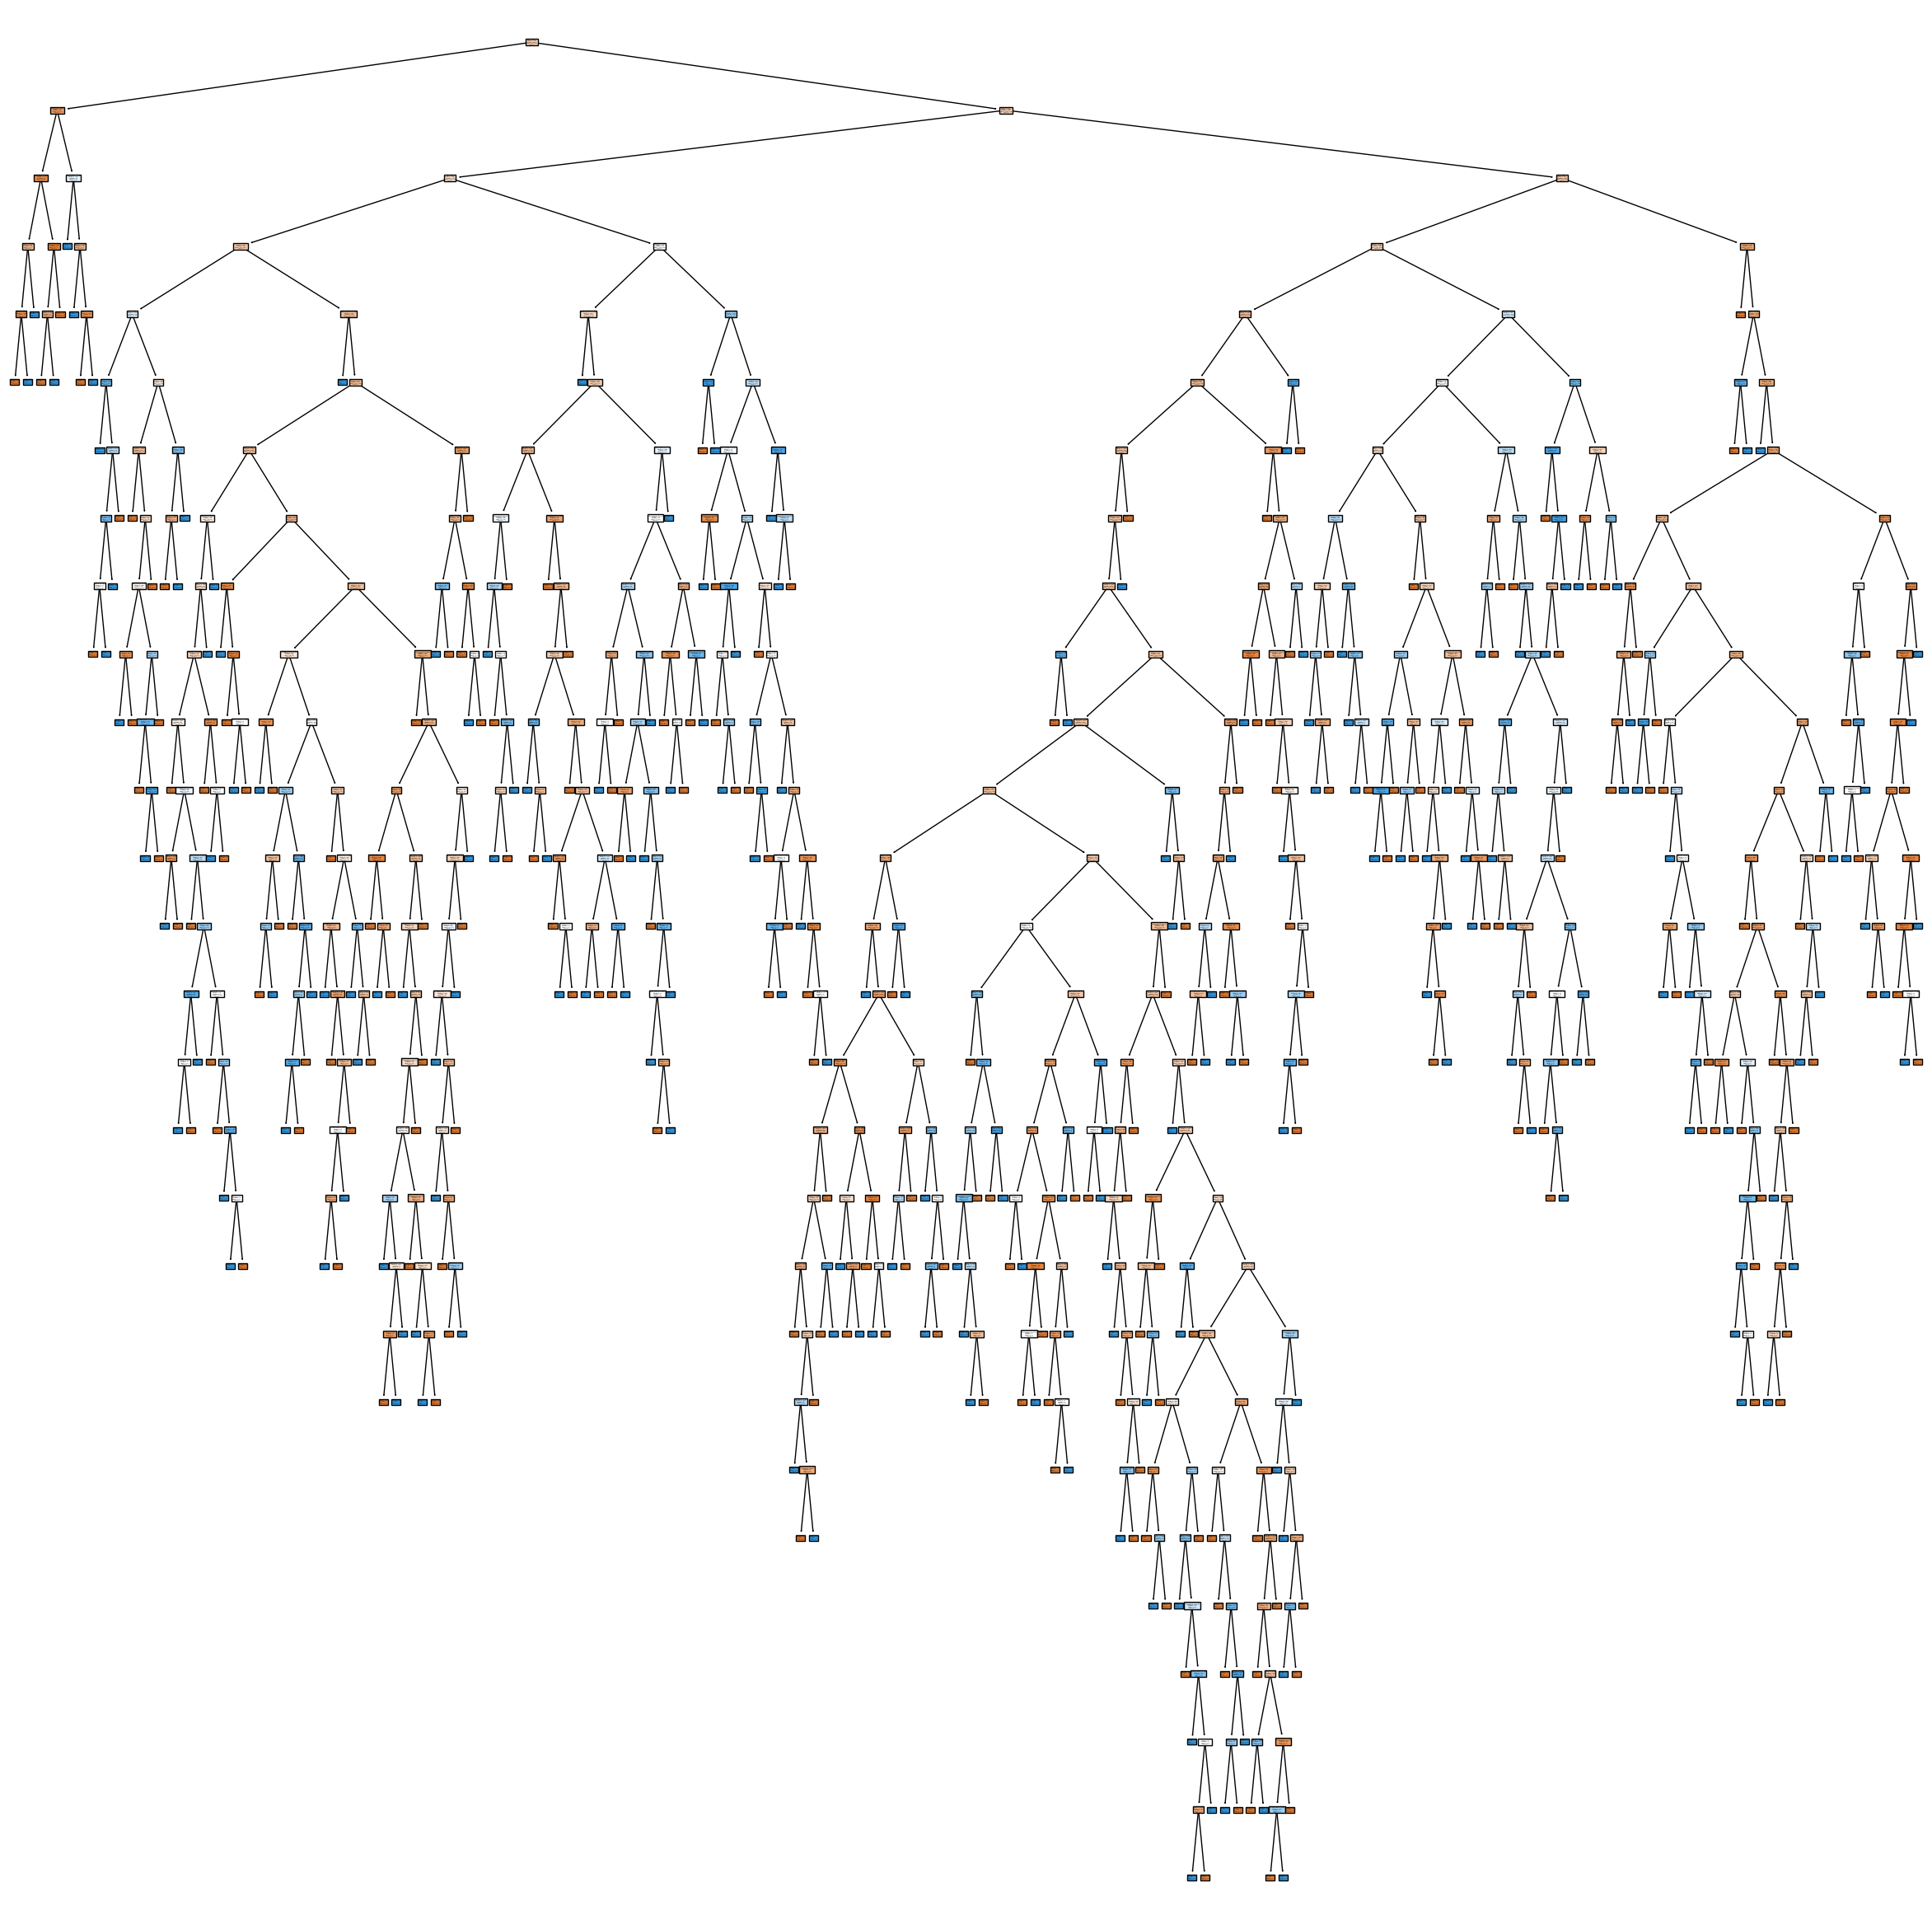

In [62]:
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(decision_tree_model, 
                   feature_names=cols,  
                   class_names=["0","1"],
                   filled=True)

**3. Do predictions on the test set**

In [63]:
y_pred_prob = decision_tree_model.predict_proba(x_test)[:,1]

In [64]:
y_pred = decision_tree_model.predict(x_test)

**4. Calculate the performance measures**

**Confusion matrix**

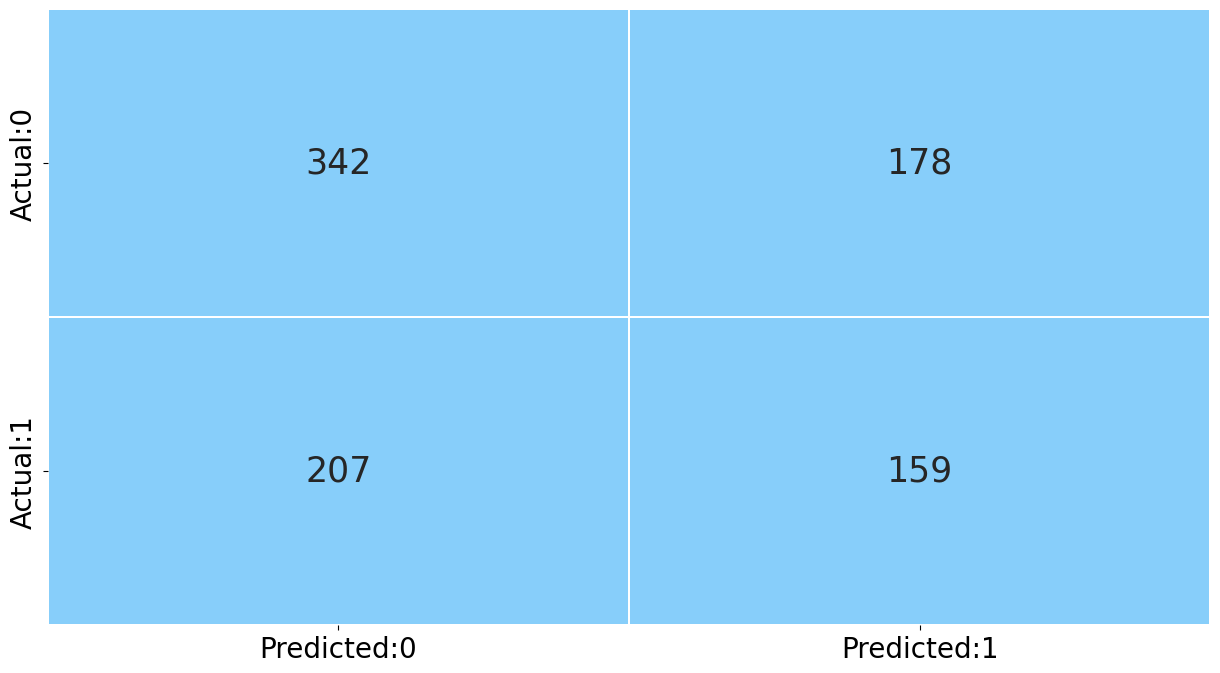

In [65]:
plot_confusion_matrix(decision_tree_model)

**Calculate performance measures on the test set.**

In [66]:
test_report = get_test_report(decision_tree_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.62      0.66      0.64       520
           1       0.47      0.43      0.45       366

    accuracy                           0.57       886
   macro avg       0.55      0.55      0.55       886
weighted avg       0.56      0.57      0.56       886



**Interpretation:** The accuracy is 57% for this model. 

**Calculate Kappa Score**

In [67]:
kappa_value = kappa_score(decision_tree_model)
print(kappa_value)

0.0932121837234896


**Plot the ROC curve**

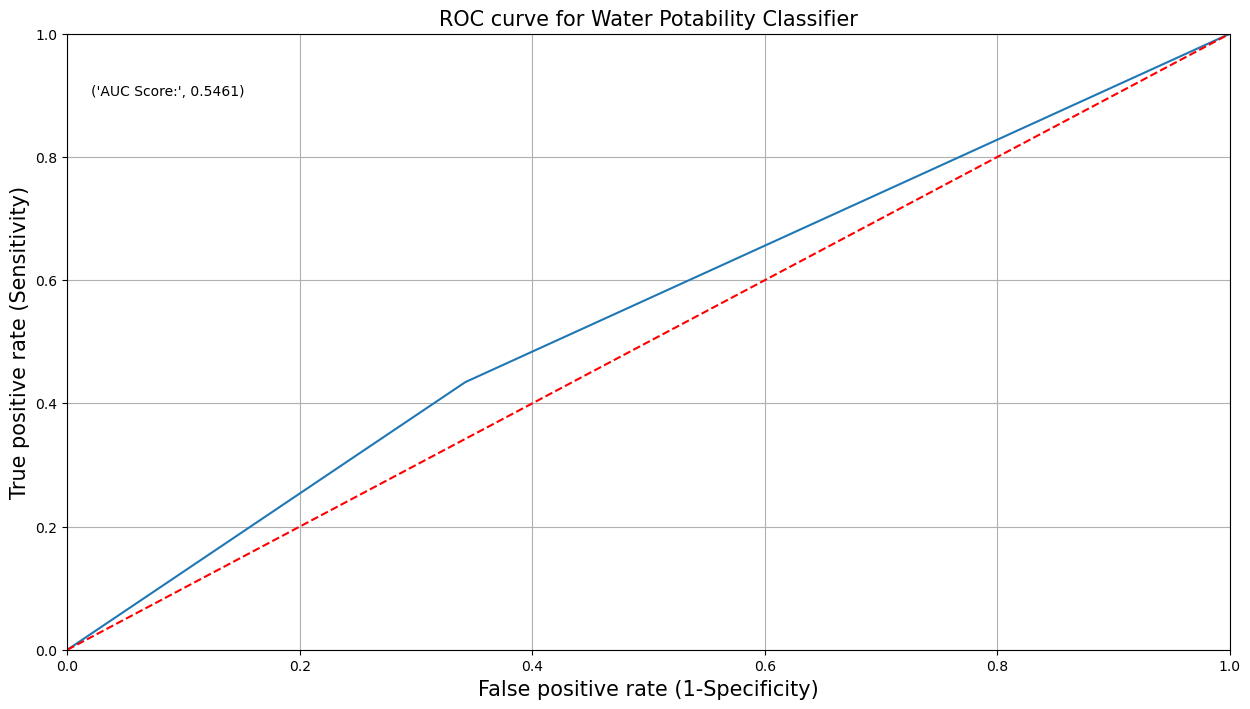

In [68]:
plot_roc(decision_tree_model)

We see our classifier (Decision Tree) to be away from the dotted line with the AUC score 0.5461.

**5. Tabulate the results**

In [69]:
update_score_card(model_name='Decision Tree')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression (MLE),0.495728,0.402556,0.688525,0.449210,-0.027784,0.508065
1,Logistic Regression (SGD),0.511060,0.416084,0.325137,0.532731,0.004116,0.365031
2,Decision Tree,0.546059,0.471810,0.434426,0.565463,0.093212,0.452347


## 5.2.1 Prune a Decision Tree

Pruning reduces the size of the decision tree by removing the internal nodes of the tree. It decreases the complexity of the tree, and so improves the accuracy of prediction. It is useful because trees may fit the training data well, but may do a poor prediction on test data. A simpler tree often avoids over-fitting.

**1. Prune the decision tree**

We prune the decision tree by specifying the maximum depth and maximum number of leaves of the tree. 

We use the unscaled features to build the tree.

In [70]:
# instantiate the 'DecisionTreeClassifier' object
# max_depth: maximum depth of the tree 
# max_leaf_nodes: maximum number of leaf nodes in the tree
# pass the 'random_state' to obtain the same samples for each time you run the code
prune = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 25 , random_state = 10)

# fit the model using fit() on train data
decision_tree_prune = prune.fit(x_train, y_train)

**Plot Desicion Tree**

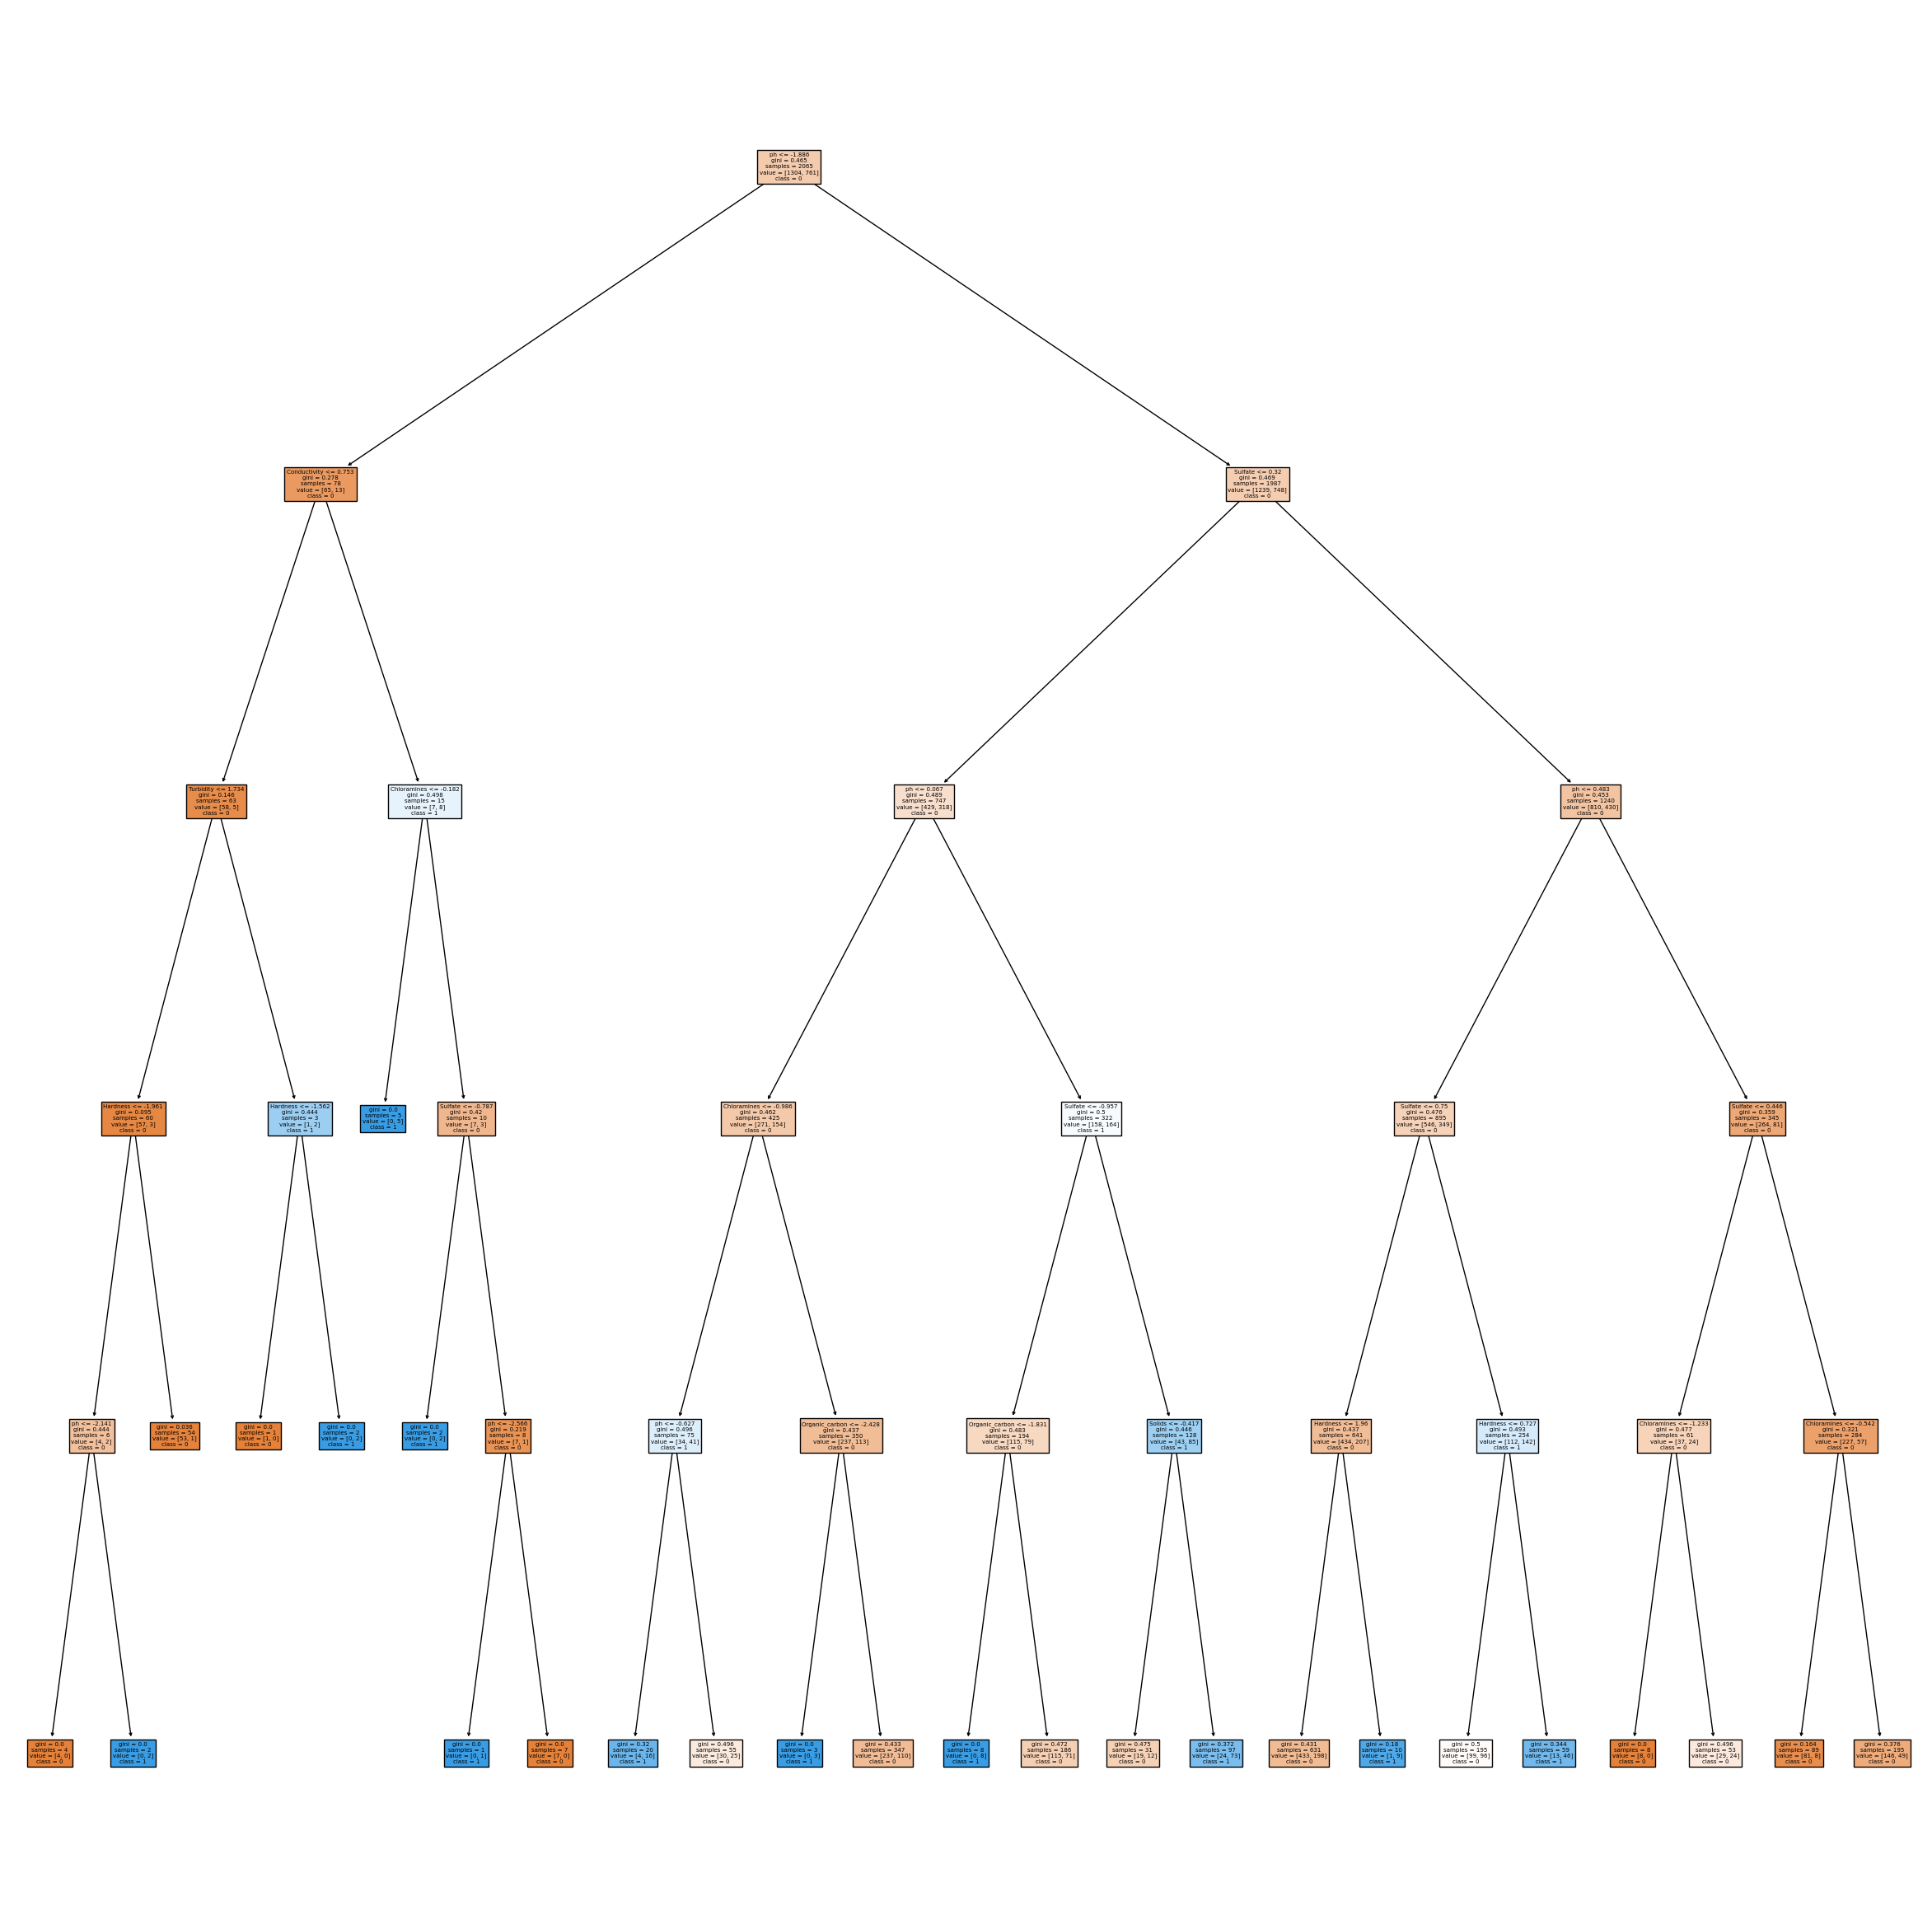

In [71]:
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(decision_tree_prune, 
                   feature_names=cols,  
                   class_names=["0","1"],
                   filled=True)

**2. Do predictions on the test set**

In [72]:
y_pred_prob = decision_tree_prune.predict_proba(x_test)[:,1]

In [73]:
y_pred = decision_tree_prune.predict(x_test)

**3. Calculate the performance measures**

**Confusion Matrix**

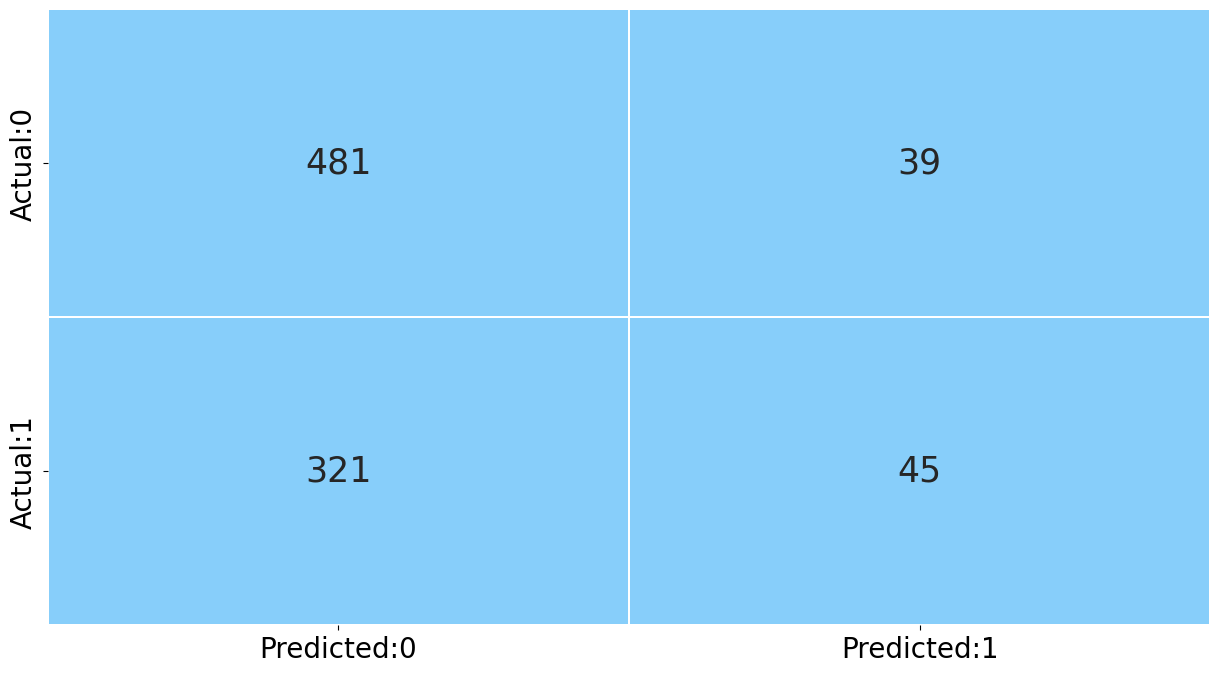

In [74]:
plot_confusion_matrix(decision_tree_prune)

**Calculate performance measures on the test set**

In [75]:
test_report = get_test_report(decision_tree_prune)
print(test_report)

              precision    recall  f1-score   support

           0       0.60      0.93      0.73       520
           1       0.54      0.12      0.20       366

    accuracy                           0.59       886
   macro avg       0.57      0.52      0.46       886
weighted avg       0.57      0.59      0.51       886



**Interpretation:** The accuracy is 59% for this model. 

**Calculate Kappa Score**

In [76]:
kappa_value = kappa_score(decision_tree_prune)
print(kappa_value)

0.05412618768015376


**Plot the ROC curve**

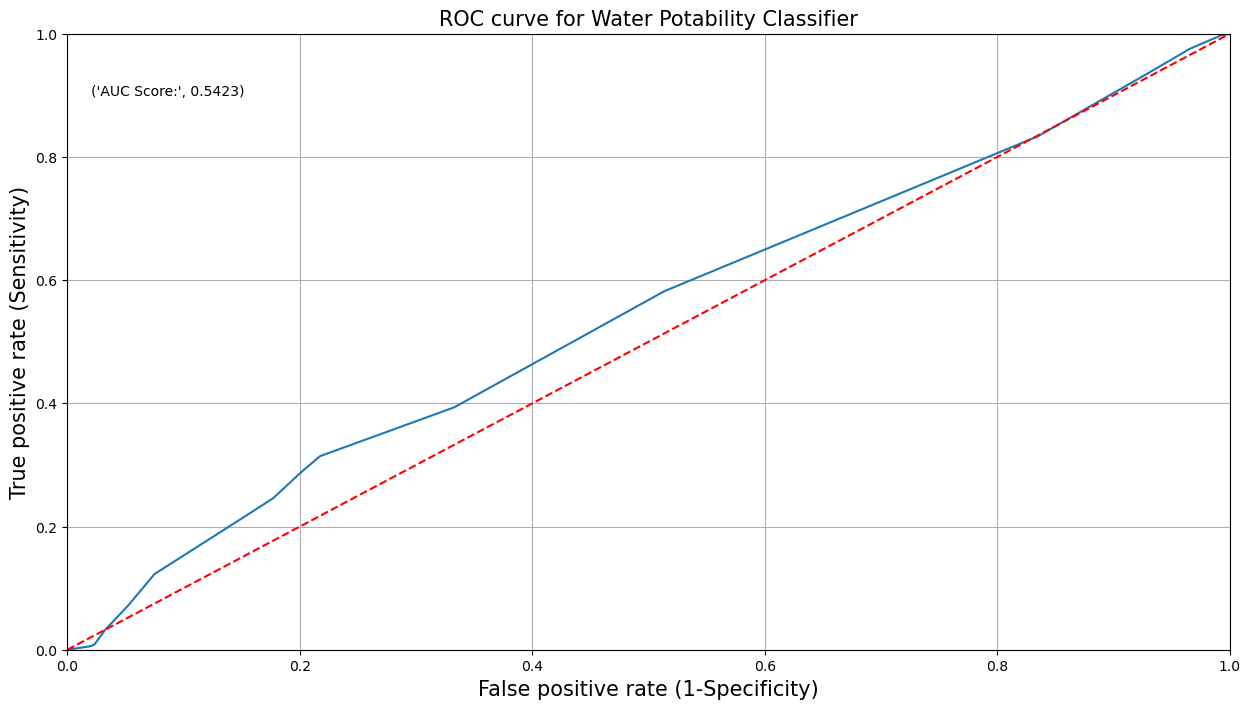

In [77]:
plot_roc(decision_tree_prune)

We see our classifier (decision tree with pruning) to be away from the dotted line with the AUC score 0.5423.

**4. Tabulate the results**

In [78]:
update_score_card(model_name = 'Decision Tree (Pruned)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression (MLE),0.495728,0.402556,0.688525,0.449210,-0.027784,0.508065
1,Logistic Regression (SGD),0.511060,0.416084,0.325137,0.532731,0.004116,0.365031
2,Decision Tree,0.546059,0.471810,0.434426,0.565463,0.093212,0.452347
3,Decision Tree (Pruned),0.542344,0.535714,0.122951,0.593679,0.054126,0.200000


## 5.2.2 Decision Tree (using GridSearchCV)

Now we show how a decision tree is optimized by cross-validation, which is done using the `GridSearchCV()` from sklearn library.

The performance of the selected hyperparameters and trained model is then measured on the test set that was not used during the model building.

**1. Use GridSearch to obtain the optimal values of hyperparameters**

In [79]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass the list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass the list of values to 'max_depth' that assigns maximum depth of the tree
# pass the list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass the list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'criterion': ['gini', 'entropy'],
                     'min_samples_split': [10, 20, 30],
                     'max_depth': [3, 5, 7, 9],
                     'min_samples_leaf': [15, 20, 25, 30, 35],
                     'max_leaf_nodes': [5, 10, 15, 20, 25]}]

In [80]:
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
grid = GridSearchCV(estimator = decision_tree_classification, param_grid = tuned_paramaters, cv = 10)
dt_grid = grid.fit(x_train, y_train)
print('Best parameters for decision tree classifier: ', dt_grid.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 25, 'min_samples_split': 10} 



**2. Build the model using the hyperparameters obtained in step 1**

In [81]:
dt_grid_model = DecisionTreeClassifier(criterion = dt_grid.best_params_.get('criterion'),
                                       max_depth = dt_grid.best_params_.get('max_depth'),
                                       max_leaf_nodes = dt_grid.best_params_.get('max_leaf_nodes'),
                                       min_samples_leaf = dt_grid.best_params_.get('min_samples_leaf'),
                                       min_samples_split = dt_grid.best_params_.get('min_samples_split'),
                                       random_state = 10)
dt_grid_model = dt_grid_model.fit(x_train, y_train)

**Plot Desicion Tree**

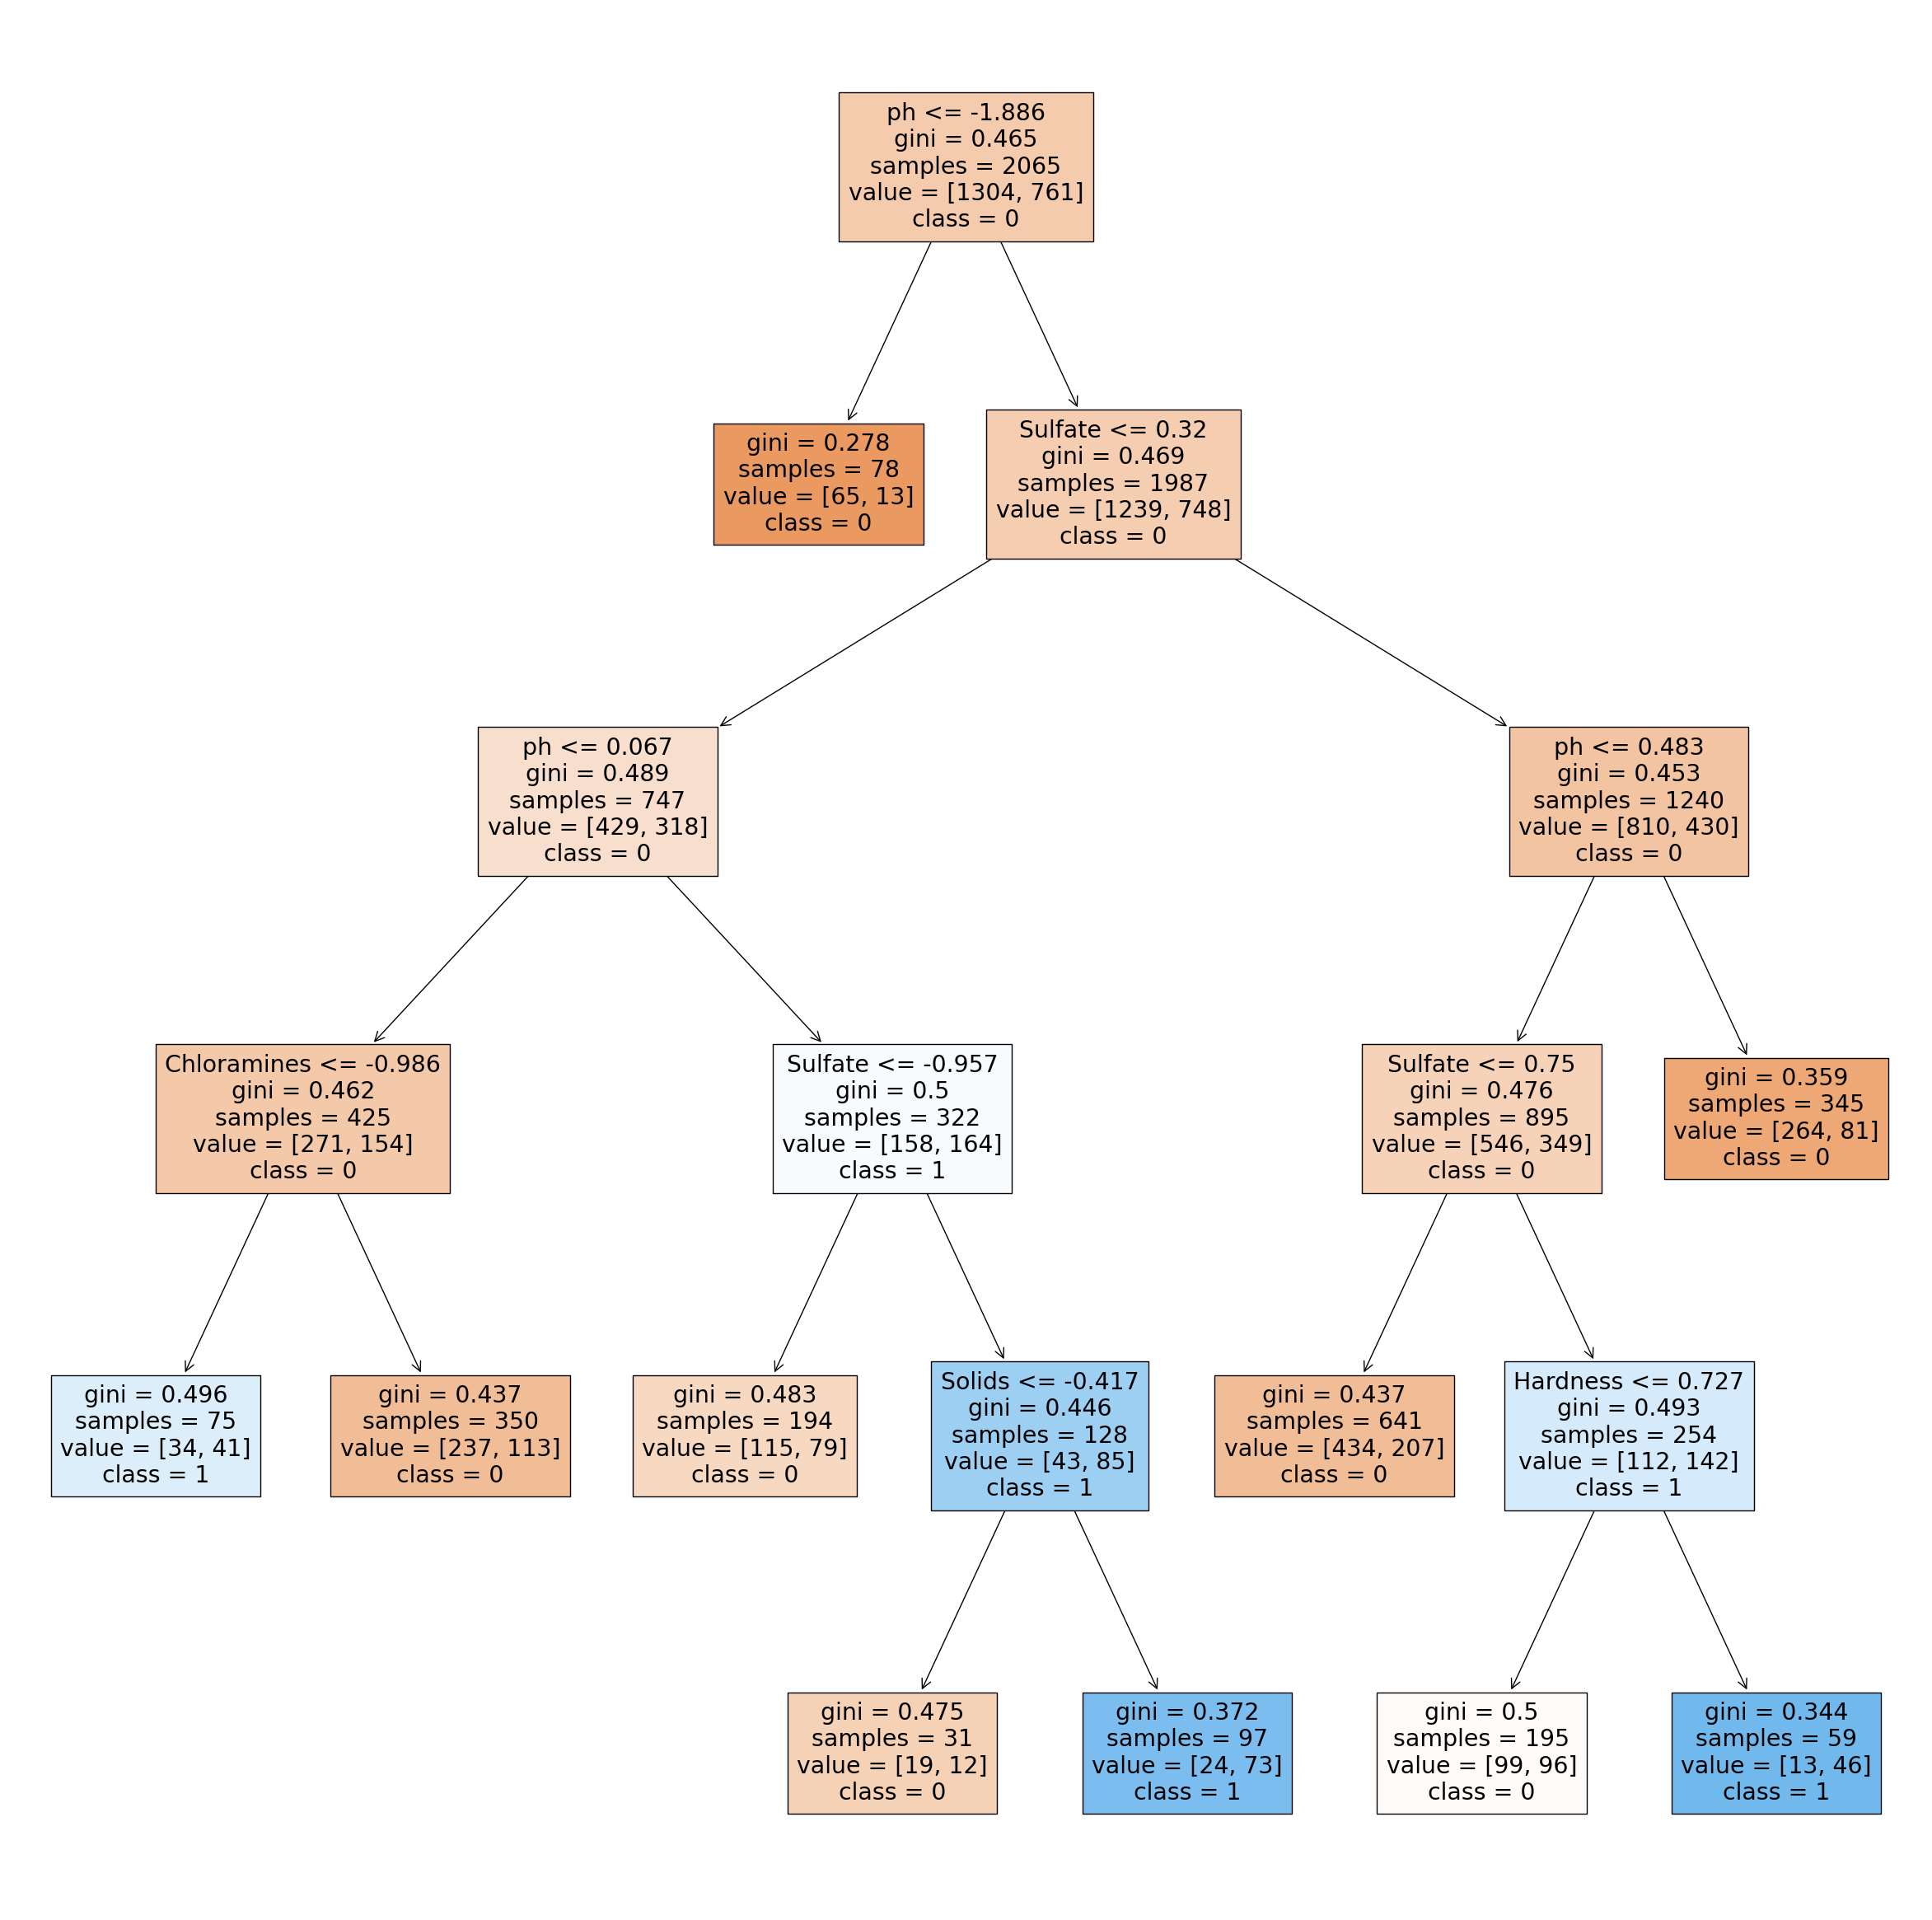

In [82]:
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(dt_grid_model, 
                   feature_names=cols,  
                   class_names=["0","1"],
                   filled=True)

**3. Do predictions on the test set**

In [83]:
y_pred_prob = dt_grid_model.predict_proba(x_test)[:,1]

In [84]:
y_pred = dt_grid_model.predict(x_test)

**4. Calculate the performance measures**

**Confusion Matrix**

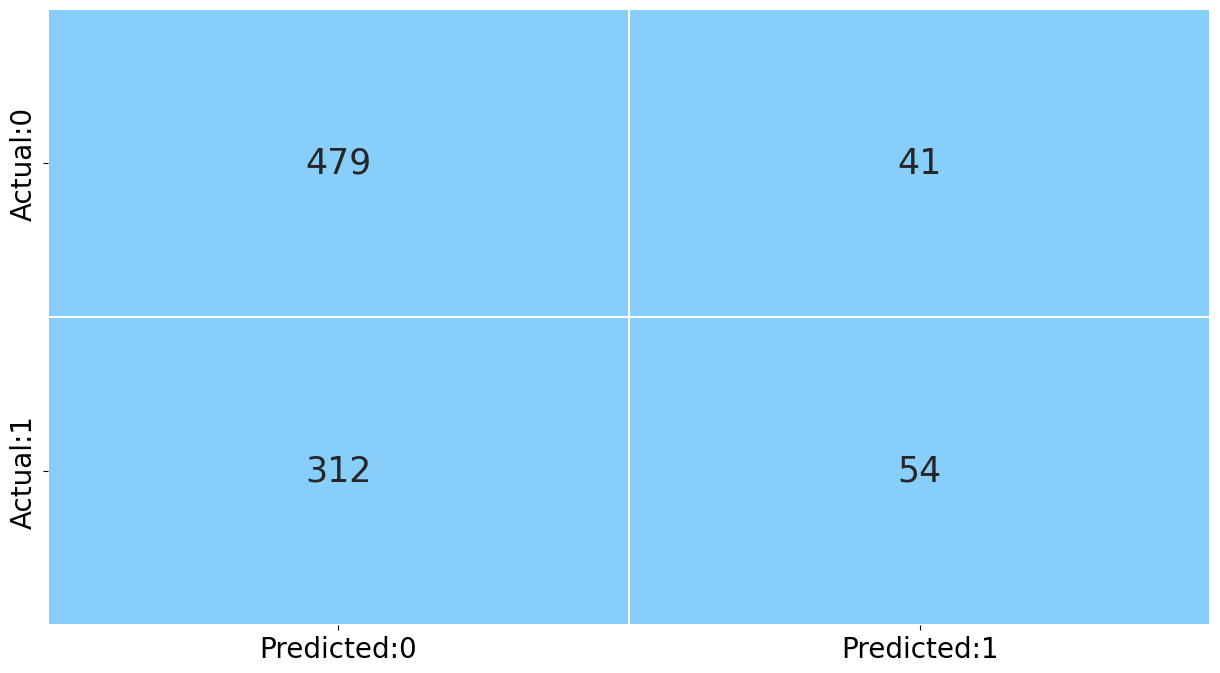

In [85]:
plot_confusion_matrix(dt_grid_model)

**Calculate performance measures on the test set**

In [86]:
test_report = get_test_report(dt_grid_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.61      0.92      0.73       520
           1       0.57      0.15      0.23       366

    accuracy                           0.60       886
   macro avg       0.59      0.53      0.48       886
weighted avg       0.59      0.60      0.53       886



**Interpretation:** The accuracy is 60% for this model.

**Calculate Kappa Score**

In [87]:
kappa_value = kappa_score(dt_grid_model)
print(kappa_value)

0.07715413713537078


**Plot the ROC curve**

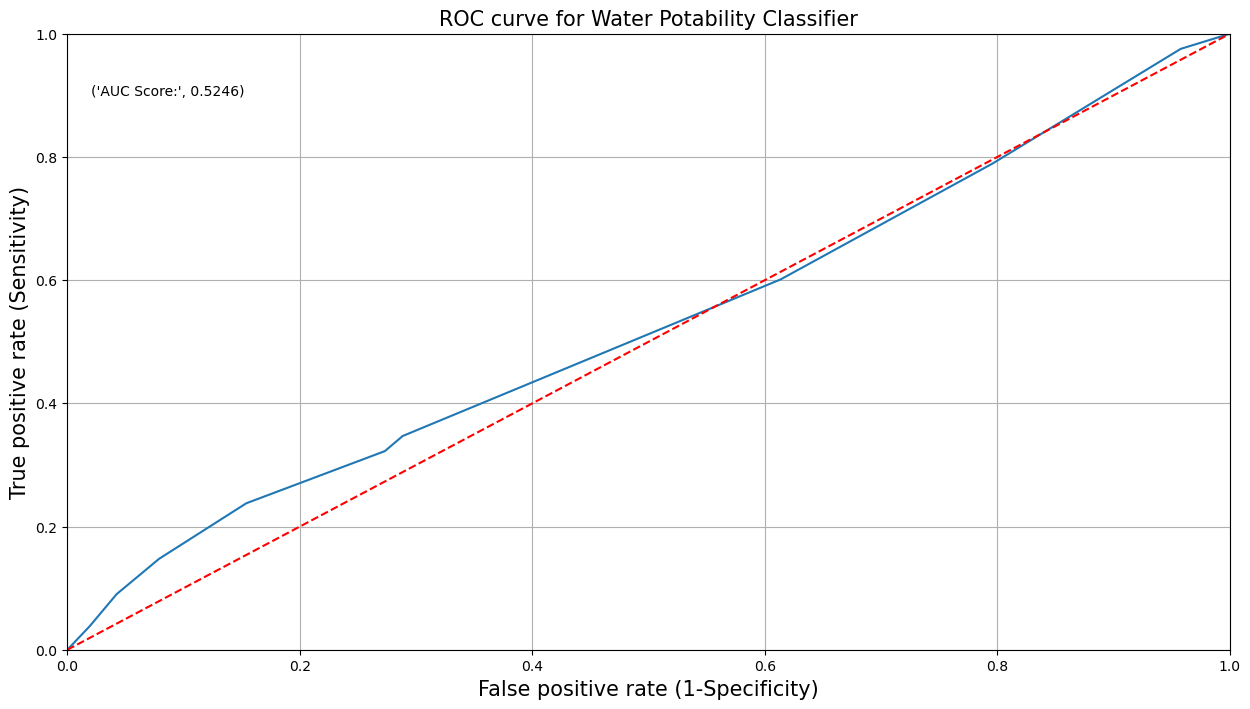

In [88]:
plot_roc(dt_grid_model)

We see our classifier (decision tree with GridSearchCV) is not to be away from the dotted line with the AUC score 0.5246.

**5. Tabulate the results**

In [89]:
update_score_card(model_name = 'Decision Tree (GridSearchCV)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression (MLE),0.495728,0.402556,0.688525,0.449210,-0.027784,0.508065
1,Logistic Regression (SGD),0.511060,0.416084,0.325137,0.532731,0.004116,0.365031
2,Decision Tree,0.546059,0.471810,0.434426,0.565463,0.093212,0.452347
3,Decision Tree (Pruned),0.542344,0.535714,0.122951,0.593679,0.054126,0.200000
4,Decision Tree (GridSearchCV),0.524627,0.568421,0.147541,0.601580,0.077154,0.234273


## 5.3 Random Forest Classification

**1. Split the dataset into train and test sets**

In [90]:
x=pd.DataFrame(features_updated)
x=sm.add_constant(x)
x.head()

,const,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,1.0,-6.685161e-16,0.286133,-0.099843,0.126246,0.784840,1.732275,-1.228286,1.180685,-1.322763
1,1.0,-2.527323e+00,-2.290404,-0.367348,-0.336283,-1.738306,2.089019,0.269202,-0.358036,0.698732
2,1.0,7.717163e-01,0.946619,-0.208983,1.500457,-1.738306,-0.086634,0.795988,0.148366,-1.200754
3,1.0,9.355314e-01,0.609891,0.052038,0.654264,0.703651,-0.777480,1.285109,1.850670,0.867173
4,1.0,1.519205e+00,-0.526045,-0.447932,-0.397942,0.377298,-0.338748,-0.860640,-1.579055,0.139189


In [91]:
y=pd.DataFrame(target)

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 10)
print("X_train",x_train.shape)
print("y_train",y_train.shape)
print("X_test",x_test.shape)
print("y_test",y_test.shape)

X_train (2065, 10)
y_train (2065, 1)
X_test (886, 10)
y_test (886, 1)


**2. Build the model**

In [93]:
rf=RandomForestClassifier(n_estimators=100,random_state=10)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=10)

**3. Do predictions on the test set**

In [94]:
y_pred_prob = rf.predict_proba(x_test)[:,1]

In [95]:
y_pred=rf.predict(x_test)

**4. Calculate the performance measures**

**Confusion Matrix**

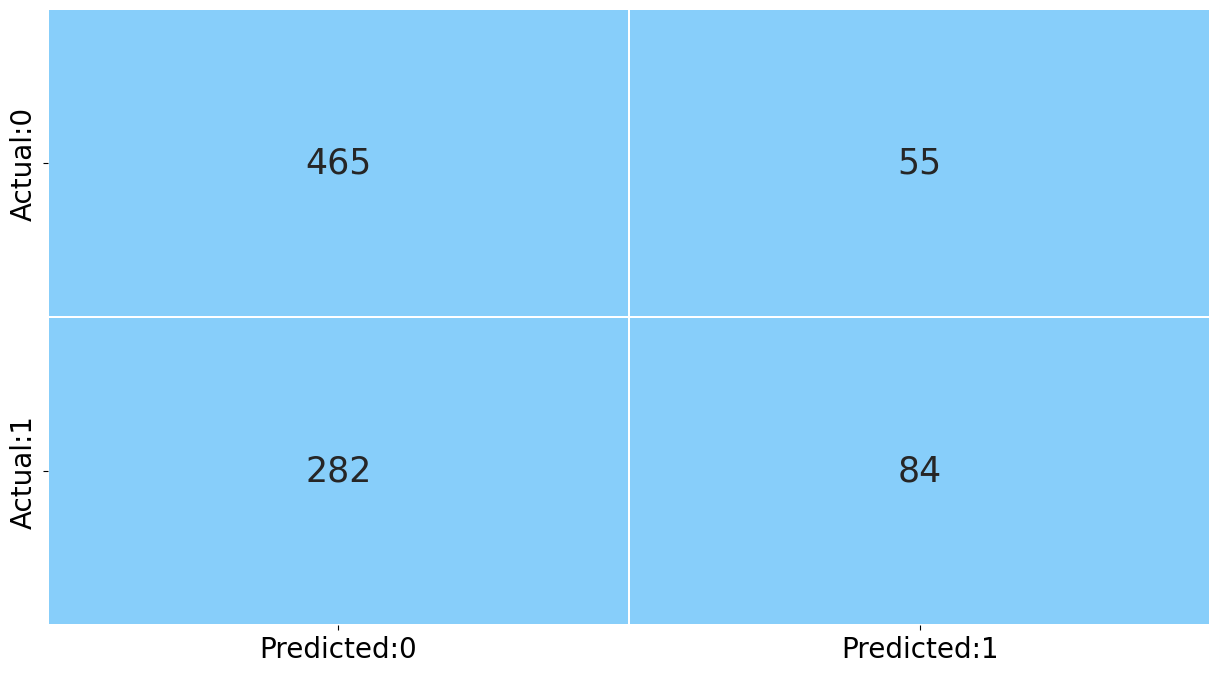

In [96]:
plot_confusion_matrix(rf)

**Calculate performance measures on the test set**

In [97]:
test_report=get_test_report(rf)
print(test_report)

              precision    recall  f1-score   support

           0       0.62      0.89      0.73       520
           1       0.60      0.23      0.33       366

    accuracy                           0.62       886
   macro avg       0.61      0.56      0.53       886
weighted avg       0.61      0.62      0.57       886



**Interpretation:** The accuracy is 62% for this model.

**Calculate Kappa Score**

In [98]:
kappa_value=kappa_score(rf)
print(kappa_value)

0.13625239381859622


**Plot the ROC curve**

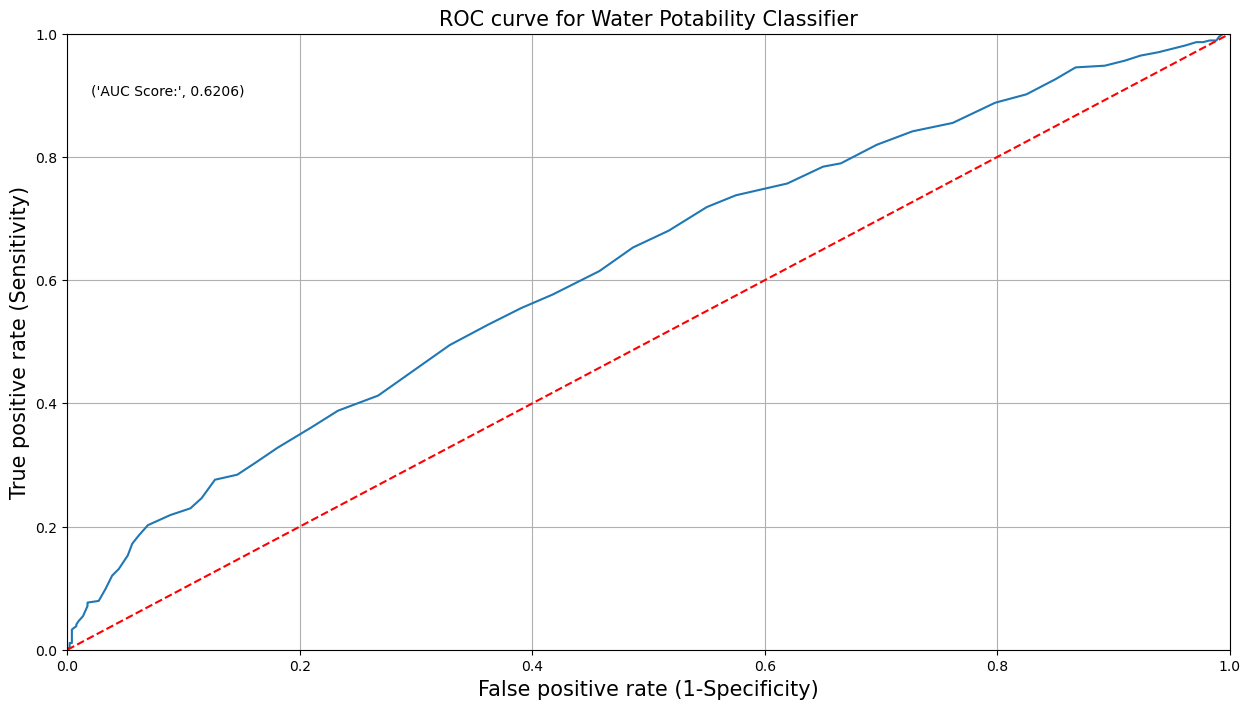

In [99]:
plot_roc(rf)

We see our classifier (Random Forest)  to be away from the dotted line with the AUC score 0.6206.

**5. Tabulate the results**

In [100]:
update_score_card(model_name='Random Forest Classifier')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression (MLE),0.495728,0.402556,0.688525,0.449210,-0.027784,0.508065
1,Logistic Regression (SGD),0.511060,0.416084,0.325137,0.532731,0.004116,0.365031
2,Decision Tree,0.546059,0.471810,0.434426,0.565463,0.093212,0.452347
3,Decision Tree (Pruned),0.542344,0.535714,0.122951,0.593679,0.054126,0.200000
4,Decision Tree (GridSearchCV),0.524627,0.568421,0.147541,0.601580,0.077154,0.234273
5,Random Forest Classifier,0.620589,0.604317,0.229508,0.619639,0.136252,0.332673


## 5.3.1 Random Forest Classifier (using GridSearchCV)

**1. Use GridSearch to obtain the optimal values of hyperparameters**

In [101]:
tuned_parameters=[{'n_estimators':[50,85,100],
                  'min_samples_split':[15,20,25],
                  'max_depth':[10,15,20],
                  'min_samples_leaf':[5,10,15],
                  'max_leaf_nodes':[10,15,20]}]

**2. Build the model using the hyperparameters obtained in step 1**

In [102]:
rf_CV=RandomForestClassifier(random_state=10)
grid=GridSearchCV(estimator=rf_CV,param_grid=tuned_parameters,cv=10)
dt_grid=grid.fit(x_train,y_train)
print("Best Parameters for random forest classifier: ",dt_grid.best_params_,'\n')

Best Parameters for random forest classifier:  {'max_depth': 10, 'max_leaf_nodes': 20, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 85} 



In [103]:
dt_grid_model=RandomForestClassifier(n_estimators=dt_grid.best_params_.get('n_estimators'),
                                   max_depth=dt_grid.best_params_.get('max_depth'),
                                   max_leaf_nodes=dt_grid.best_params_.get('max_leaf_nodes'),
                                   min_samples_leaf=dt_grid.best_params_.get('min_samples_leaf'),
                                   min_samples_split=dt_grid.best_params_.get('min_samples_split'),
                                   random_state=10)

dt_grid_model=dt_grid_model.fit(x_train,y_train)

**3. Do predictions on the test set**

In [104]:
y_pred_prob = dt_grid_model.predict_proba(x_test)[:,1]

In [105]:
y_pred= dt_grid_model.predict(x_test)

**4. Calculate the performance measures**

**Confusion Matrix**

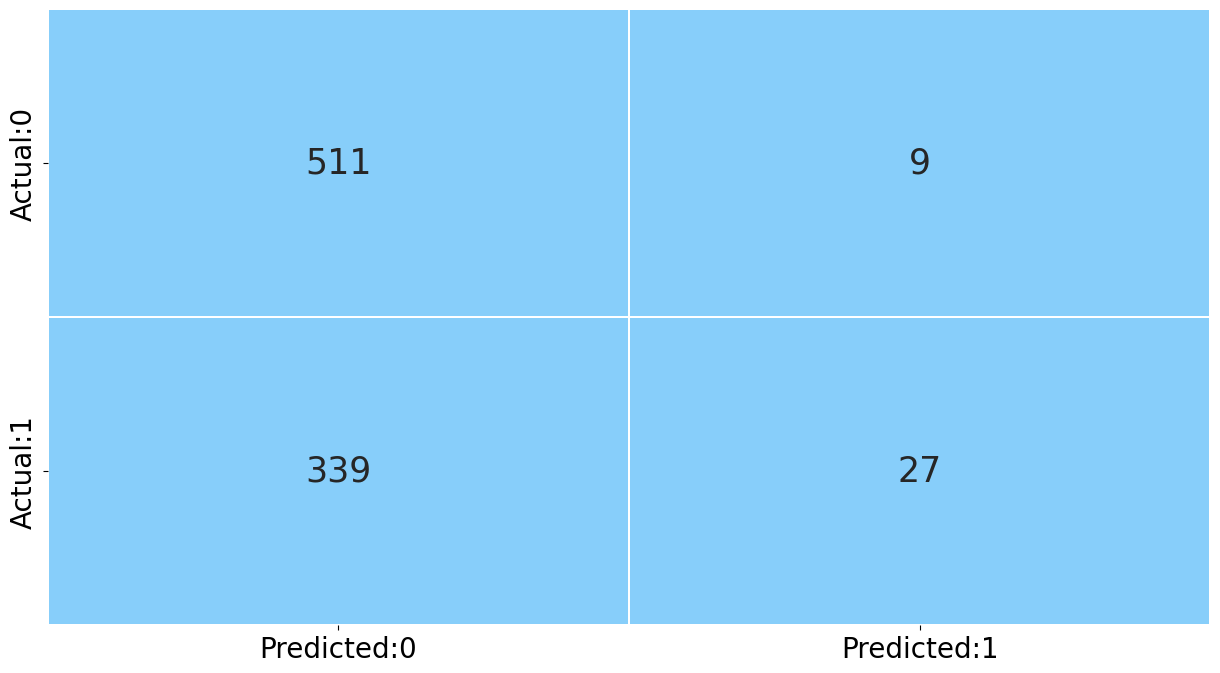

In [106]:
plot_confusion_matrix(dt_grid_model)

**Calculate performance measures on the test set**

In [107]:
test_report=get_test_report(dt_grid_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.60      0.98      0.75       520
           1       0.75      0.07      0.13       366

    accuracy                           0.61       886
   macro avg       0.68      0.53      0.44       886
weighted avg       0.66      0.61      0.49       886



**Interpretation**: The accuracy is 62% for this model.**

**Calculate Kappa Score**

In [108]:
kappa_value=kappa_score(dt_grid_model)
print(kappa_value)

0.06516281608149888


**Plot ROC Curve**

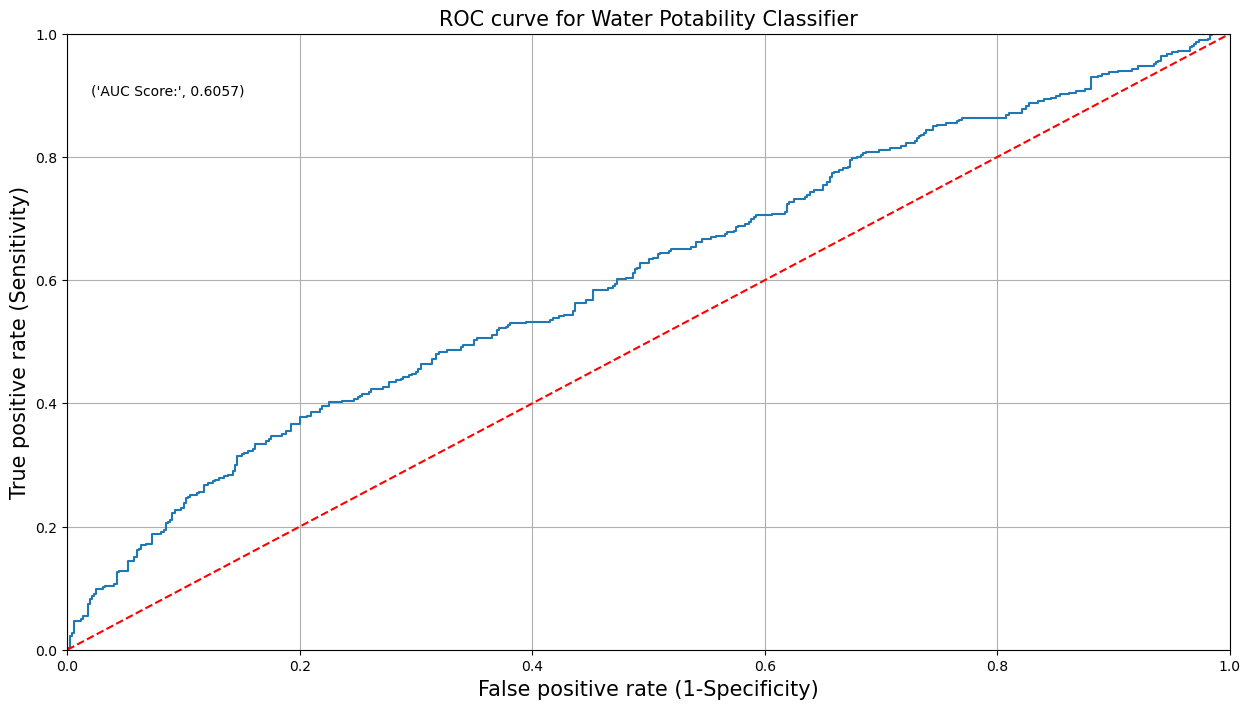

In [109]:
plot_roc(dt_grid_model)

We see our classifier (Random Forest)  to be away from the dotted line with the AUC score 0.6057.

**5. Tabulate the Result**

In [110]:
update_score_card(model_name='Random Forest Classifier (GridSearchCV)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression (MLE),0.495728,0.402556,0.688525,0.449210,-0.027784,0.508065
1,Logistic Regression (SGD),0.511060,0.416084,0.325137,0.532731,0.004116,0.365031
2,Decision Tree,0.546059,0.471810,0.434426,0.565463,0.093212,0.452347
3,Decision Tree (Pruned),0.542344,0.535714,0.122951,0.593679,0.054126,0.200000
4,Decision Tree (GridSearchCV),0.524627,0.568421,0.147541,0.601580,0.077154,0.234273
5,Random Forest Classifier,0.620589,0.604317,0.229508,0.619639,0.136252,0.332673
6,Random Forest Classifier (GridSearchCV),0.605659,0.750000,0.073770,0.607223,0.065163,0.134328


# 6. Conclusion and Interpretation

**Lets, Print The Final Score Card Containing All Models Performance**

In [111]:
score_card

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression (MLE),0.495728,0.402556,0.688525,0.449210,-0.027784,0.508065
1,Logistic Regression (SGD),0.511060,0.416084,0.325137,0.532731,0.004116,0.365031
2,Decision Tree,0.546059,0.471810,0.434426,0.565463,0.093212,0.452347
3,Decision Tree (Pruned),0.542344,0.535714,0.122951,0.593679,0.054126,0.200000
4,Decision Tree (GridSearchCV),0.524627,0.568421,0.147541,0.601580,0.077154,0.234273
5,Random Forest Classifier,0.620589,0.604317,0.229508,0.619639,0.136252,0.332673
6,Random Forest Classifier (GridSearchCV),0.605659,0.750000,0.073770,0.607223,0.065163,0.134328


**The supervised classification learning algorithms named in the above table have been implemented on the given dataset. The performance of the models is evaluated using AUC score, accuracy, precision, f1-score, recall, and kappa score.**

**The above table shows that the Random Forest Classifier has the highest values for most of the performance measures like AUC Score,  Accuracy and Kappa Score. Therefore, it can be concluded that the Random Forest Classifier can be used to predict that the water is potable or not to use.We can not say that the model is build best for use because, the accuracy is only 62% but, among all models build it came out that Random Forest Classifier is better than other models. In future when we have more observations or bigger dataset, then we can build better model with more accuracy and other performance metrics.**

## Conculsion:
From the project we can conculde that the **Random Forest Classifier** model came out the better model than other Models for our dataset.